# Contact
Created by: Ania Supady <p/>
Date:       03/2022 <p/>
>www.linkedin.com/in/aniasupady <p/>
>ania.b.supady@gmail.com

# Kaggle Challenge

The purpose of this challenge is to:

1. Investigate the data for money laundering, list conclusions
2. Develop own examples of money laundering rules using [BSA](https://www.occ.gov/topics/supervision-and-examination/bsa/index-bsa.html),


Data Source:

https://www.kaggle.com/datasets/ealaxi/paysim1

https://www.researchgate.net/publication/313138956_PAYSIM_A_FINANCIAL_MOBILE_MONEY_SIMULATOR_FOR_FRAUD_DETECTION

# Import Data

## Set Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

## Access csv file on google drive

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1FNAhhRaV0BkWWfG83zNqEr0122enfQIQ'
out_path = 'kaggle.csv'
gdown.download(url, out_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FNAhhRaV0BkWWfG83zNqEr0122enfQIQ
To: /content/kaggle.csv

  0%|          | 0.00/494M [00:00<?, ?B/s]
  2%|▏         | 9.96M/494M [00:00<00:04, 98.3MB/s]
  4%|▍         | 19.9M/494M [00:00<00:07, 67.1MB/s]
  6%|▋         | 30.9M/494M [00:00<00:05, 80.2MB/s]
  8%|▊         | 40.4M/494M [00:00<00:05, 83.4MB/s]
 10%|▉         | 49.3M/494M [00:00<00:05, 79.8MB/s]
 12%|█▏        | 57.7M/494M [00:00<00:07, 59.5MB/s]
 14%|█▎        | 67.6M/494M [00:00<00:06, 65.5MB/s]
 16%|█▌        | 77.6M/494M [00:01<00:05, 70.5MB/s]
 19%|█▊        | 91.8M/494M [00:01<00:04, 87.9MB/s]
 21%|██        | 102M/494M [00:01<00:06, 65.1MB/s] 
 24%|██▍       | 118M/494M [00:01<00:04, 84.7MB/s]
 26%|██▌       | 128M/494M [00:01<00:04, 83.3MB/s]
 28%|██▊       | 138M/494M [00:01<00:05, 70.5MB/s]
 30%|██▉       | 147M/494M [00:02<00:04, 70.5MB/s]
 31%|███▏      | 155M/494M [00:02<00:04, 71.0MB/s]
 33%|███▎      | 164M/494M [00:02<00:04, 74.8MB/s]
 35%|███▍      | 172

'kaggle.csv'

In [ ]:
!ls #to verify content

kaggle.csv  kaggle.csvrb4r0k_ctmp  sample_data


In [ ]:
kaggle_2 = pd.read_csv('kaggle.csv')
kaggle_2.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Examine the Fraud

In [ ]:
print(kaggle_2.shape)

(6362620, 11)


In [ ]:
t=kaggle_2['isFraud'].value_counts() / len(kaggle_2['isFraud'])
t

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

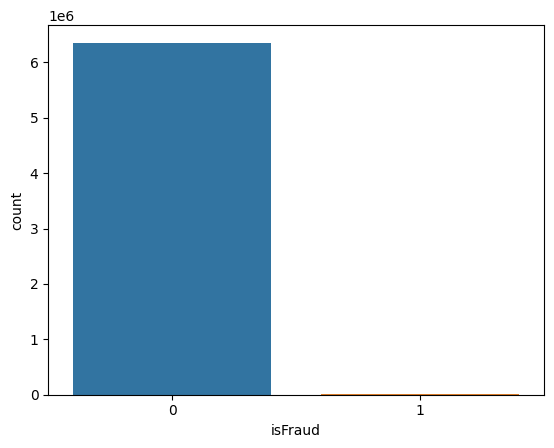

In [ ]:
t=sns.countplot(x=kaggle_2['isFraud'])

In [ ]:
kaggle_2['counter'] = 1

TransbyClass = pd.concat([kaggle_2.groupby("isFraud")["counter"].sum(),kaggle_2.groupby("isFraud")["amount"].sum(),kaggle_2.groupby("isFraud")["amount"].mean()],axis=1)
TransbyClass.columns = ["Frequency", "SumAmount","MeanAmount"]
TransbyClass.head()

,Frequency,SumAmount,MeanAmount
isFraud,,,
0,6354407,1.132337e+12,1.781970e+05
1,8213,1.205642e+10,1.467967e+06


In [ ]:
pd.crosstab(kaggle_2['counter'], kaggle_2['isFraud'])

isFraud,0,1
counter,,
1,6354407,8213


## Examine the amount

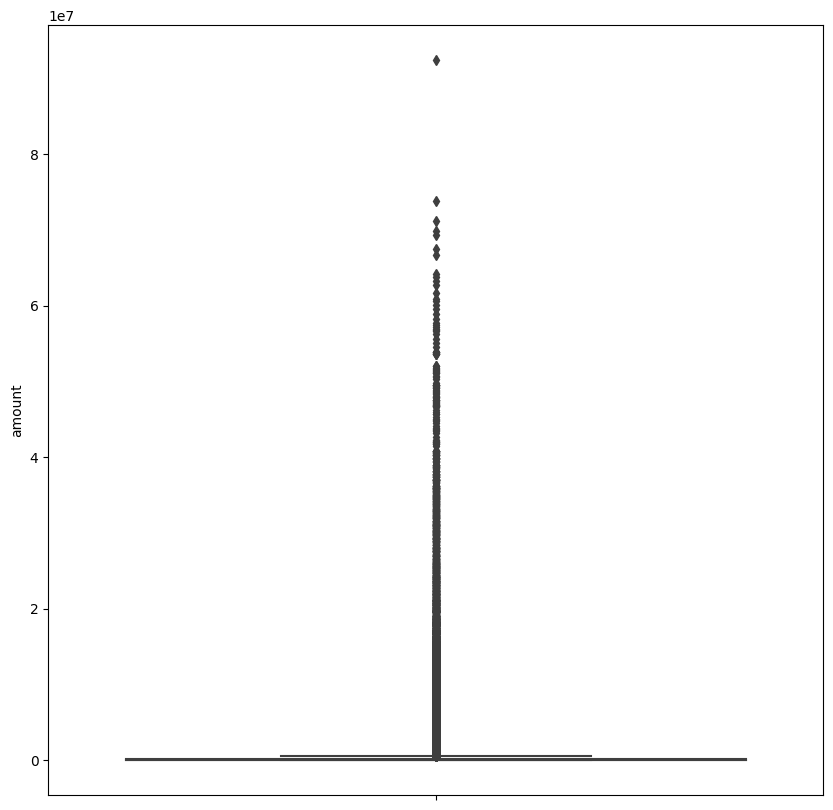

In [ ]:
fig = plt.figure(figsize =(10, 10))
t2=sns.boxplot(y='amount', data=kaggle_2)

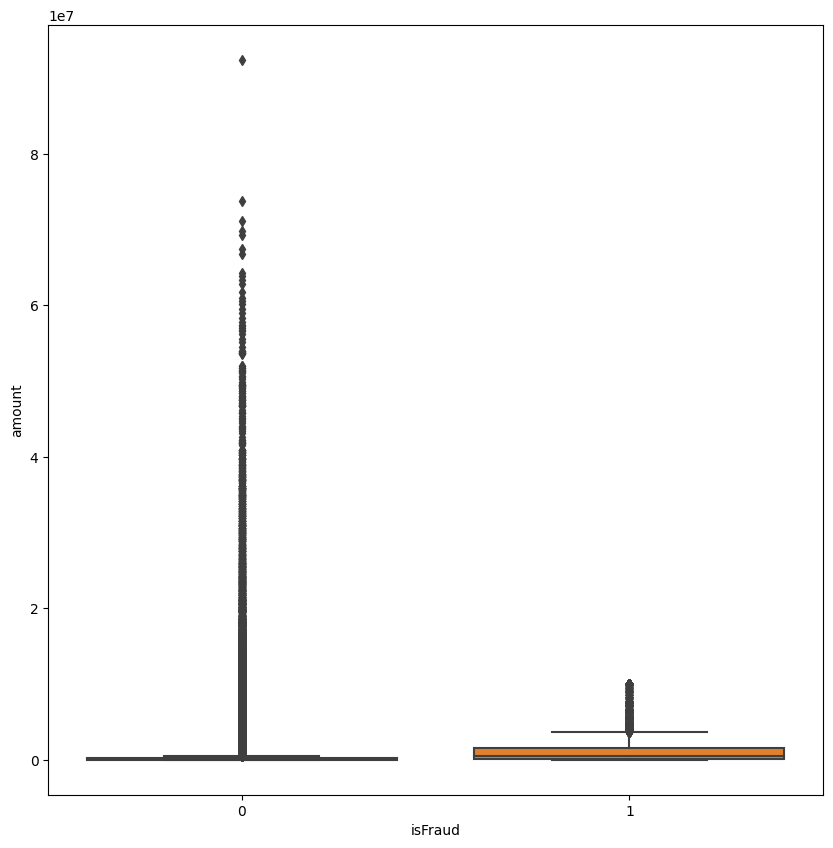

In [ ]:
fig = plt.figure(figsize =(10, 10))
t=sns.boxplot(x='isFraud', y='amount', data=kaggle_2)

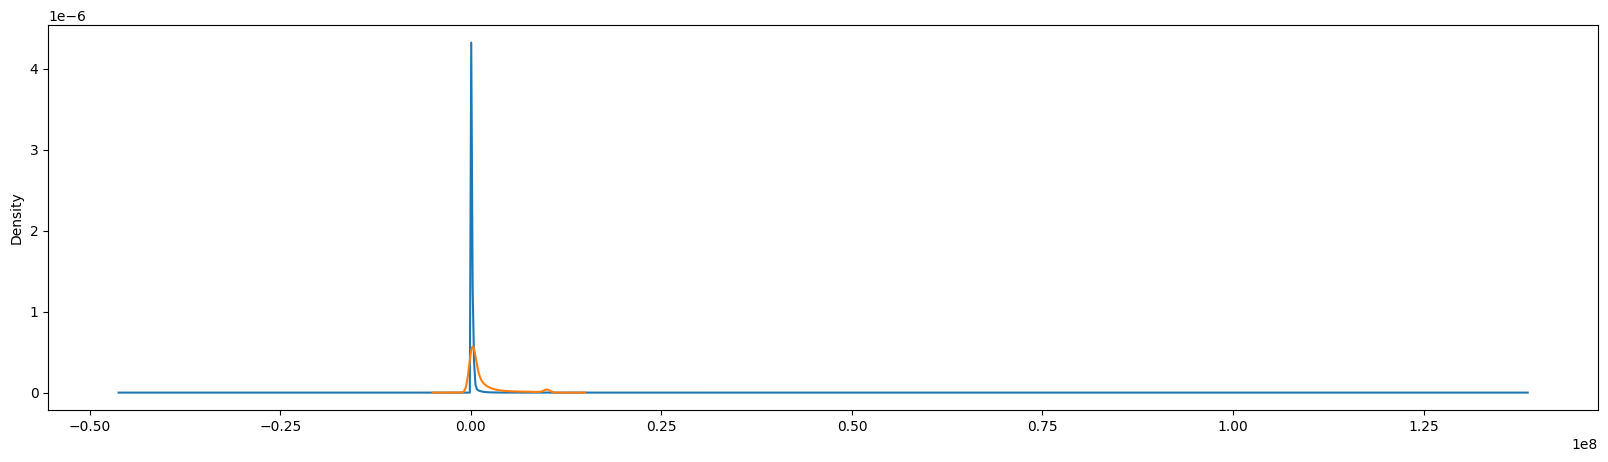

In [ ]:
fig = plt.figure(figsize =(20, 5))
fig=kaggle_2.groupby("isFraud").amount.plot(kind='kde')

<Axes: >

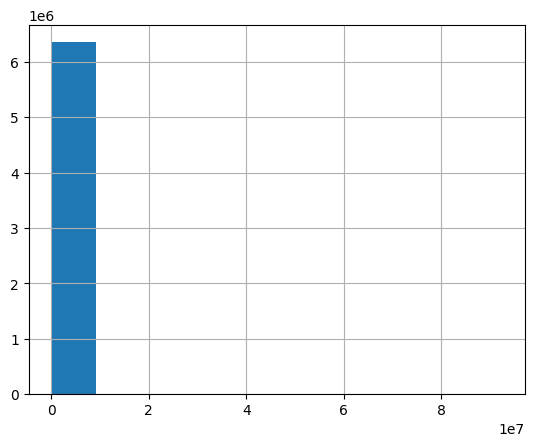

In [ ]:
kaggle_2['amount'].hist()

## Create copy of dataset

In [ ]:
Import=kaggle_2.copy()

## Data overview

In [ ]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range'])
numerical = []
categorical = []

for col in Import.columns:
    obs = Import[col].size
    p_nan = round(Import[col].isna().sum()/obs, 2)
    num_nan = f'{p_nan}% ({Import[col].isna().sum()}/{obs})'
    dtype = 'categorical' if Import[col].dtype == object else 'numerical'
    numerical.append(col) if dtype == 'numerical' else categorical.append(col)
    rng = f'{len(Import[col].unique())} labels' if dtype == 'categorical' else f'{Import[col].min()}-{Import[col].max()}'
    description[col] = [obs, num_nan, dtype, rng]



pd.set_option('display.max_columns', 150)
display(description)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
observations(rows),6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
percent missing,0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620),0.0% (0/6362620)
dtype,numerical,categorical,numerical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,numerical,numerical
range,1-743,5 labels,0.0-92445516.64,6353307 labels,0.0-59585040.37,0.0-49585040.37,2722362 labels,0.0-356015889.35,0.0-356179278.92,0-1,0-1,1-1


In [ ]:
#I would like to know, how many unique originators am I dealing with?
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(Import)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
Total,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
Uniques,743,5,5316900,6353307,1845844,2682586,2722362,3614697,3555499,2,2,1


In [ ]:
x=6362620-6353307
x

9313

In [ ]:
y=6353307/6362620*100
y

99.85362947967975

In [ ]:
x=6362620-2722362
x

3640258

In [ ]:
y=2722362/6362620*100
y

42.78680795018404

**Conclusion:**

There are no missing values. The dollar "amount variable" ranges from 0.0 to 92,445,516.64 There are two variables that denote fraud in the data set (isFraud and is FlaggedFraud). Nearly all originators (6,353,307 out of 6,362,620) in the dataset are unique (99.85%). Only 42.78% of receiving parties are unique (2,722,362), which means the money travels from unique accounts to the same receivers more often than to unique ones.

## Data manipulation steps

### Creating "date" elements from step

Following steps list exploratory data analysis:

Based on the first glance of the data, I am noticing that there is no date variable. This data contains only step variable, which represents duration of 1 h (60 minutes), an interval of each transaction. The most logical way to solve this is by creating date and time variable. I got the date with following steps:
</p>
1. First I converted step to 24 hour interval with Modulus operator.
</p>
2.Then, I generated the Day based on the logic that one day has 24 hours.
</p>
1.Next, I created arbitrary Year variable (2020)
</p>
4.Lastly, I created month that has 31 days (the data is described to have been simulated for 31 days, so January fits this case)
</p>
5.Some problem came up with date being assigned to 0 and both first and last day having only half day of transactions. I had to  find a way to re-balance the data (details in code).

In [ ]:
Import["hour"] = Import.step % 24
Import["Day"] = round(Import.step/24)
Import['Year'] = 2020
Import['Month'] = 1
Import['counter'] = 1
Import.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,hour,Day,Year,Month
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,1,1,0.0,2020,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1,1,0.0,2020,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,1,1,0.0,2020,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,1,1,0.0,2020,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,1,1,0.0,2020,1
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,1,1,0.0,2020,1
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,1,1,0.0,2020,1
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,1,1,0.0,2020,1
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,1,1,0.0,2020,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,1,1,0.0,2020,1


In [ ]:
Import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  counter         int64  
 12  hour            int64  
 13  Day             float64
 14  Year            int64  
 15  Month           int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 776.7+ MB


**Conclusion:** I need to examine data features. I can already see that the Day that I created is a float and not integer. I will fix this in next step.

In [ ]:
pd.crosstab(Import['Day'], Import['hour'])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,2708,1014,552,565,665,1660,6837,21097,37628,35991,37241,36153,0,0,0,0,0,0,0,0,0,0,0
1.0,3216,1598,440,41,4,4,8,12,12,23616,30904,29157,0,37515,41485,44609,42471,43361,49579,51352,40625,19152,12635,6144
2.0,5693,764,6,14,8,10,4,12,18,6,20,20,39786,34000,31453,23391,34270,36348,41304,45060,38523,18500,12445,8681
3.0,14,8,22,8,4,10,10,10,10,10,10,12,0,14,8,8,18,20,24,6,18,20,6,20
4.0,6350,685,14,8,6,12,12,8,14,18,18,10,24,14,18,6,8,6,16,8,10,4444,10372,6858
5.0,3144,1074,414,52,4,10,6,14,8,21986,32890,36375,0,12,10,10,2,6,4,10,14,12,12,5740
6.0,3523,1117,522,84,12,22,14,18,6,19475,29241,29927,63539,35147,32391,27556,30340,32559,31422,46054,37012,16434,12189,7609
7.0,3824,1464,529,14,10,14,10,8,10,17336,28204,30534,0,29764,27839,27561,27765,33049,40622,46352,39102,16542,12176,7946
8.0,4314,1511,671,141,8,4,12,10,8,17963,31949,36176,68337,31749,31900,31199,32175,37323,43747,49083,39079,17674,12669,9111


**Conclusion:**

After running crosstab, it looks like I have day and hour of value zero.
In addition, I can see that day 0 and 31 does not have full 24 hour cycle of observations. Base on a small check that I did, it only has 12 hours of observations. I just add those steps of day 0 to 31/01/2020 becase this day also has only 12 h of observations.

### Rebalancing data

I want to have day 0 changed to day 31 to add observations to January 31,
since only half day had transactions.

In [ ]:
Import["Day"].replace({0.0: 31.0}, inplace=True)
Import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  counter         int64  
 12  hour            int64  
 13  Day             float64
 14  Year            int64  
 15  Month           int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 776.7+ MB


In [ ]:
pd.crosstab(Import['Day'], Import['hour'])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,,,,
1.0,3216,1598,440,41,4,4,8,12,12,23616,30904,29157,0,37515,41485,44609,42471,43361,49579,51352,40625,19152,12635,6144
2.0,5693,764,6,14,8,10,4,12,18,6,20,20,39786,34000,31453,23391,34270,36348,41304,45060,38523,18500,12445,8681
3.0,14,8,22,8,4,10,10,10,10,10,10,12,0,14,8,8,18,20,24,6,18,20,6,20
4.0,6350,685,14,8,6,12,12,8,14,18,18,10,24,14,18,6,8,6,16,8,10,4444,10372,6858
5.0,3144,1074,414,52,4,10,6,14,8,21986,32890,36375,0,12,10,10,2,6,4,10,14,12,12,5740
6.0,3523,1117,522,84,12,22,14,18,6,19475,29241,29927,63539,35147,32391,27556,30340,32559,31422,46054,37012,16434,12189,7609
7.0,3824,1464,529,14,10,14,10,8,10,17336,28204,30534,0,29764,27839,27561,27765,33049,40622,46352,39102,16542,12176,7946
8.0,4314,1511,671,141,8,4,12,10,8,17963,31949,36176,68337,31749,31900,31199,32175,37323,43747,49083,39079,17674,12669,9111
9.0,4130,3347,12,10,6,10,8,8,10,18366,27522,30871,0,33549,29777,28288,29058,30372,33004,36889,34047,14775,10746,7975


In [ ]:
#Because the 'Day' is a float64 I need to convert it to interval so I can create a date.

Import['Day'] = Import['Day'].astype(np.int64)

In [ ]:
Import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  counter         int64  
 12  hour            int64  
 13  Day             int64  
 14  Year            int64  
 15  Month           int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 776.7+ MB


### Creating Date & Time variables

In [ ]:
#I can now create Date and Date Time variables:
Import['Date']=pd.to_datetime(Import[["Year", "Month", "Day"]])
Import['DateTime']=pd.to_datetime(Import[["Year", "Month", "Day", "hour"]])
Import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 18 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            int64         
 1   type            object        
 2   amount          float64       
 3   nameOrig        object        
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        object        
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         int64         
 10  isFlaggedFraud  int64         
 11  counter         int64         
 12  hour            int64         
 13  Day             int64         
 14  Year            int64         
 15  Month           int64         
 16  Date            datetime64[ns]
 17  DateTime        datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(8), object(3)
memory usage: 873.8+ MB


In [ ]:
Import.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,hour,Day,Year,Month,Date,DateTime
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,31,2020,1,2020-01-31,2020-01-31 01:00:00
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,31,2020,1,2020-01-31,2020-01-31 01:00:00


In [ ]:
pd.crosstab(Import['Date'], Import['hour'])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,3216,1598,440,41,4,4,8,12,12,23616,30904,29157,0,37515,41485,44609,42471,43361,49579,51352,40625,19152,12635,6144
2020-01-02,5693,764,6,14,8,10,4,12,18,6,20,20,39786,34000,31453,23391,34270,36348,41304,45060,38523,18500,12445,8681
2020-01-03,14,8,22,8,4,10,10,10,10,10,10,12,0,14,8,8,18,20,24,6,18,20,6,20
2020-01-04,6350,685,14,8,6,12,12,8,14,18,18,10,24,14,18,6,8,6,16,8,10,4444,10372,6858
2020-01-05,3144,1074,414,52,4,10,6,14,8,21986,32890,36375,0,12,10,10,2,6,4,10,14,12,12,5740
2020-01-06,3523,1117,522,84,12,22,14,18,6,19475,29241,29927,63539,35147,32391,27556,30340,32559,31422,46054,37012,16434,12189,7609
2020-01-07,3824,1464,529,14,10,14,10,8,10,17336,28204,30534,0,29764,27839,27561,27765,33049,40622,46352,39102,16542,12176,7946
2020-01-08,4314,1511,671,141,8,4,12,10,8,17963,31949,36176,68337,31749,31900,31199,32175,37323,43747,49083,39079,17674,12669,9111
2020-01-09,4130,3347,12,10,6,10,8,8,10,18366,27522,30871,0,33549,29777,28288,29058,30372,33004,36889,34047,14775,10746,7975


### Reordering

In [ ]:
#Getting names of all columns so I can reorder them:
cols = list(Import)
cols

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'counter',
 'hour',
 'Day',
 'Year',
 'Month',
 'Date',
 'DateTime']

In [ ]:
#I like this order better:

Import = Import[['step', 'Date' , 'DateTime', 'hour', 'Day', 'Month',
                 'Year', 'nameOrig',
                 'type', 'nameDest', 'oldbalanceOrg', 'amount', 'newbalanceOrig', 'oldbalanceDest',
                 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'counter']]

In [ ]:
Import.sort_values("DateTime")

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
573554,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1846699326,PAYMENT,M1454954577,0.00,6076.53,0.00,0.00,0.00,0,0,1
573177,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1021998492,PAYMENT,M495685147,11358.00,6590.91,4767.09,0.00,0.00,0,0,1
573178,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1552355690,PAYMENT,M376269894,42339.00,3566.70,38772.30,0.00,0.00,0,0,1
573179,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C2042932610,TRANSFER,C1726228995,38772.30,1774260.70,0.00,2185407.77,3959668.47,0,0,1
573180,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C956174327,TRANSFER,C1180282272,0.00,1205822.93,0.00,1278620.51,2484443.44,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C2013999242,TRANSFER,C1850423904,339682.13,339682.13,0.00,0.00,0.00,1,0,1
6362615,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C786484425,CASH_OUT,C776919290,339682.13,339682.13,0.00,0.00,339682.13,1,0,1
6362616,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1529008245,TRANSFER,C1881841831,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1
6362617,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1162922333,CASH_OUT,C1365125890,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1


In [ ]:
Import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 18 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            int64         
 1   Date            datetime64[ns]
 2   DateTime        datetime64[ns]
 3   hour            int64         
 4   Day             int64         
 5   Month           int64         
 6   Year            int64         
 7   nameOrig        object        
 8   type            object        
 9   nameDest        object        
 10  oldbalanceOrg   float64       
 11  amount          float64       
 12  newbalanceOrig  float64       
 13  oldbalanceDest  float64       
 14  newbalanceDest  float64       
 15  isFraud         int64         
 16  isFlaggedFraud  int64         
 17  counter         int64         
dtypes: datetime64[ns](2), float64(5), int64(8), object(3)
memory usage: 873.8+ MB


In [ ]:
pd.crosstab(Import['isFraud'], Import['type'])

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


### Creating Fraud Rate

In [ ]:
#I would like to view the data by variable Date. I am interested in Fraud Rate over time.

FraudsbyDate = pd.concat([Import.groupby("Date")["isFraud"].sum(),Import.groupby("Date")["isFraud"].count()],axis=1)
FraudsbyDate.columns = ["Frauds","Transactions"]
FraudsbyDate["FraudRate"] = FraudsbyDate.Frauds/FraudsbyDate.Transactions
FraudsbyDate.sort_values("Date")

,Frauds,Transactions,FraudRate
Date,,,
2020-01-01,257,477940,0.000538
2020-01-02,316,370336,0.000853
2020-01-03,290,290,1.000000
2020-01-04,286,28939,0.009883
2020-01-05,218,101809,0.002141
2020-01-06,272,456213,0.000596
2020-01-07,256,390675,0.000655
2020-01-08,242,496813,0.000487
2020-01-09,277,372780,0.000743


### Bar plots

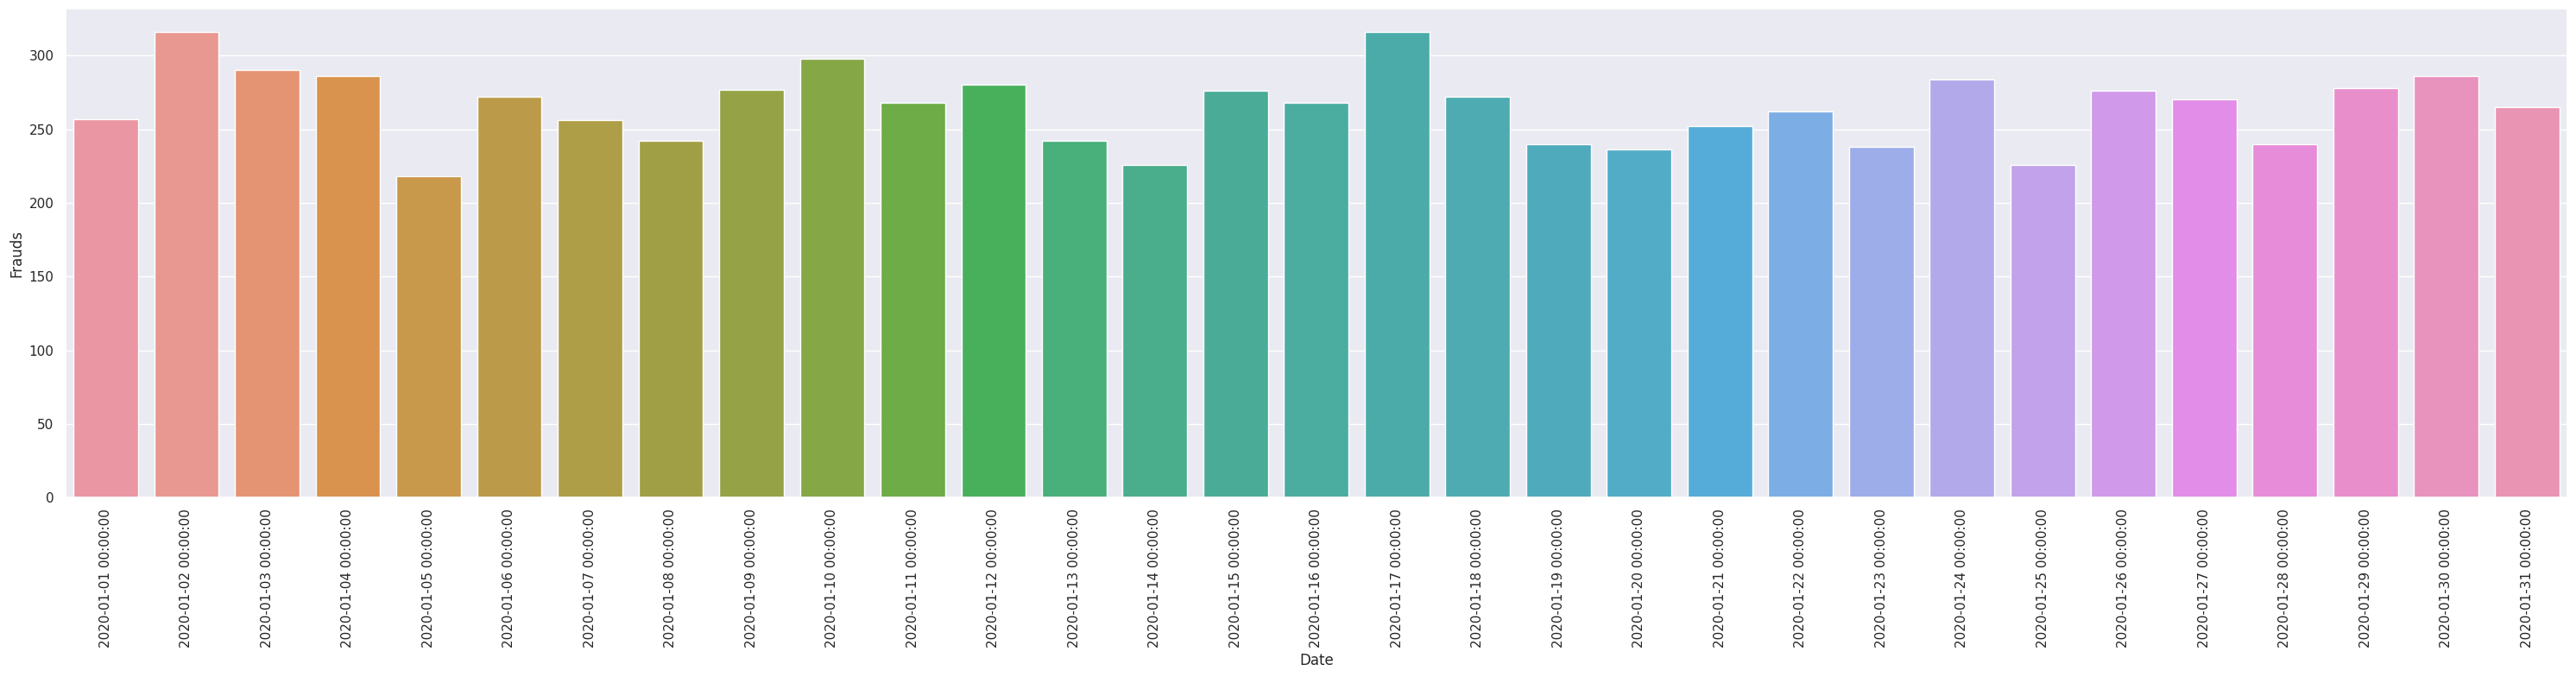

In [ ]:
#It looks like there are few cases of fraud among all transactions. I can view the distrubution by plotting it:
import seaborn as sns
f=sns.set(rc={'figure.figsize':(30, 8)})
g = sns.barplot(x=FraudsbyDate.index,y=FraudsbyDate.Frauds)
a=plt.xticks(rotation=90)
b=plt.tight_layout()
c=plt.show()

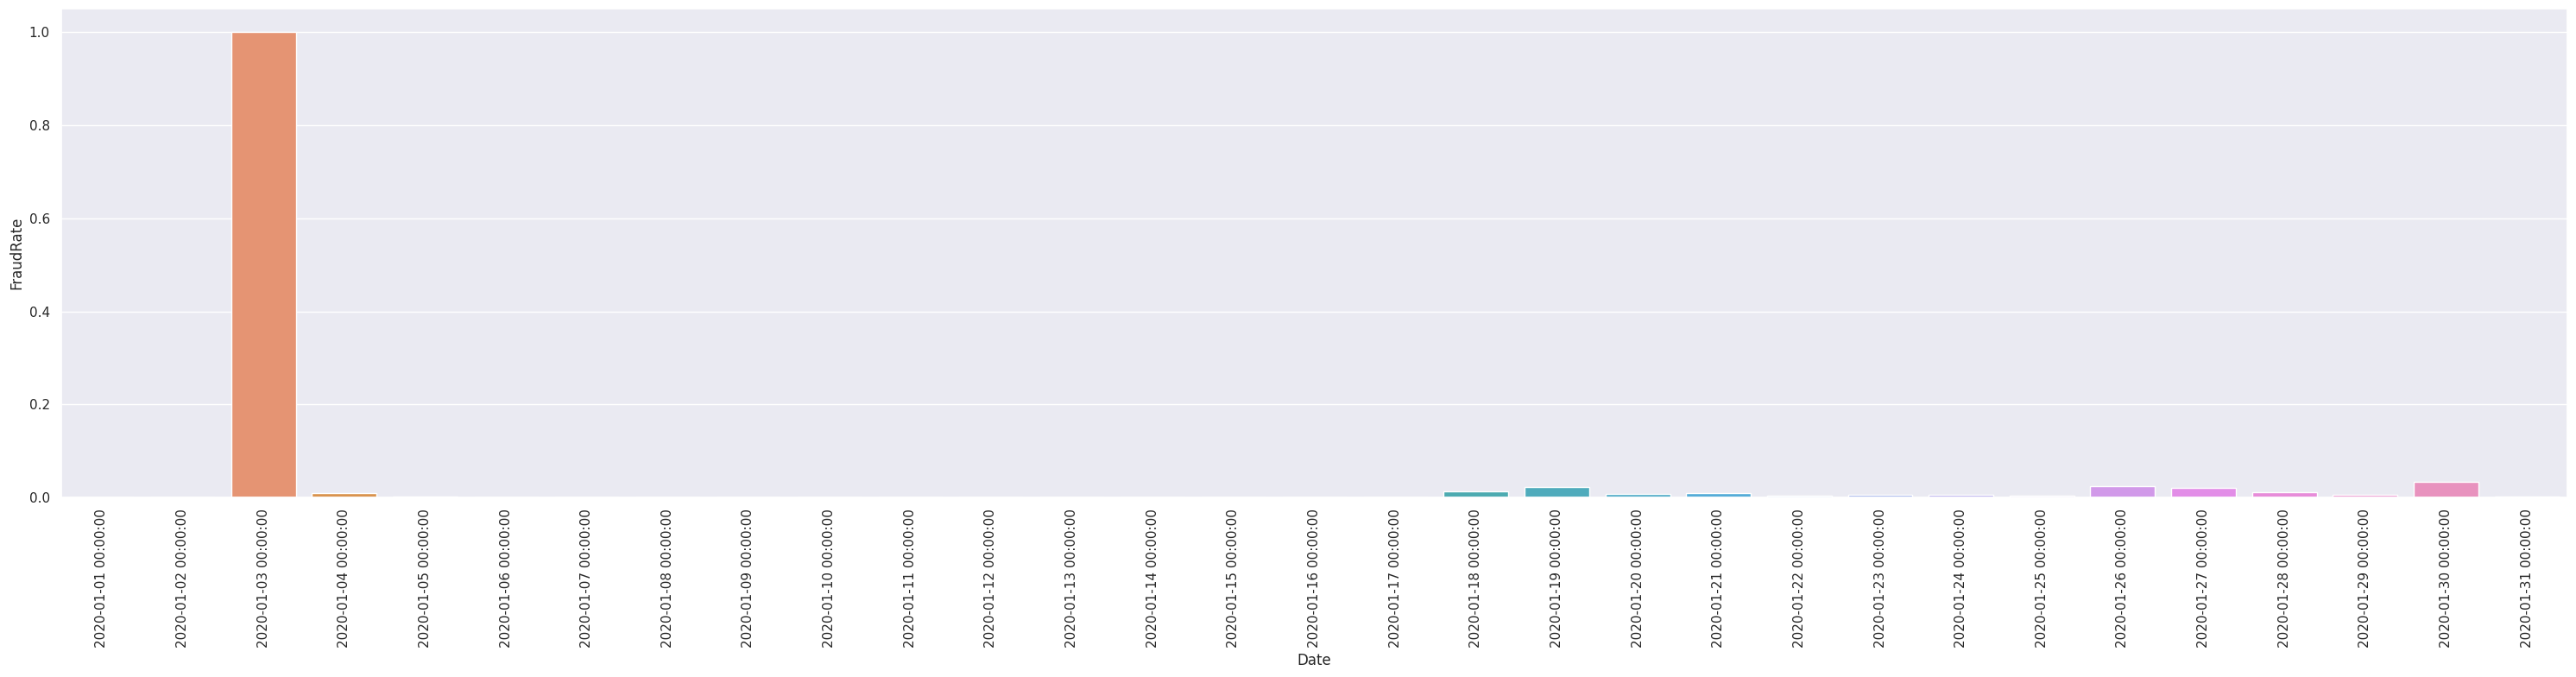

In [ ]:
#It looks like day # 3 of the month have 100% fraud rate. I can view the distrubution by plotting it:
import seaborn as sns
f=sns.set(rc={'figure.figsize':(30, 8)})
z=sns.barplot(x=FraudsbyDate.index,y=FraudsbyDate.FraudRate)
a=plt.xticks(rotation=90)
b=plt.tight_layout()
t=plt.show()

### Descriptive statistics

In [ ]:
#If I was interested in examining exact statistics, I can use describe:
FraudsbyDate.describe().T

#The average fraud rate is 0.038604 with average fraud count 264, over 31 days.
#There are average of 205,245 transactions a day.

# Based on some research, industry practice is to keep fraud at ~1% (but desired level is 0%).
# The average 4% here is definitelly influenced by the outlier.

,count,mean,std,min,25%,50%,75%,max
Frauds,31.0,264.935484,24.854155,218.000000,242.000000,268.000000,279.000000,316.0
Transactions,31.0,205245.806452,190438.205199,290.000000,26350.500000,101809.000000,390306.000000,496813.0
FraudRate,31.0,0.038604,0.178631,0.000487,0.000679,0.002141,0.010113,1.0


In [ ]:
#Let's see what the fraud rate is after we exclude 3rd  of January.

exclude = FraudsbyDate[FraudsbyDate["FraudRate"] != 1]
exclude.describe().T

#Now, the fraud rate got decimated (reduced by 10) and averages 0.006557 (which is 0.65%, so less than 1%)
# It is a result that is in line with industry expectation.

,count,mean,std,min,25%,50%,75%,max
Frauds,30.0,264.100000,24.832334,218.000000,242.000000,268.000000,277.750000,316.000000
Transactions,30.0,212077.666667,189790.645819,8566.000000,28487.500000,142022.000000,390490.500000,496813.000000
FraudRate,30.0,0.006557,0.008662,0.000487,0.000677,0.001798,0.009494,0.033388


In [ ]:
#I can aggregate the data with confirmed fraud to examine what 'type' categories contribute to it the most and how does it fluctuate over time.


isFraud = Import[Import["isFraud"] == 1]
isFraud

Type = isFraud.groupby(['Date']).type.value_counts().unstack().fillna(0)
Type["TotalFraud"]=Type.CASH_OUT+Type.TRANSFER

Type.sort_values("Date")


,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
2,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1305486145,TRANSFER,C553264065,181.00,181.00,0.0,0.00,0.00,1,0,1
3,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C840083671,CASH_OUT,C38997010,181.00,181.00,0.0,21182.00,0.00,1,0,1
251,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1420196421,TRANSFER,C972765878,2806.00,2806.00,0.0,0.00,0.00,1,0,1
252,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C2101527076,CASH_OUT,C1007251739,2806.00,2806.00,0.0,26202.00,0.00,1,0,1
680,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C137533655,TRANSFER,C1848415041,20128.00,20128.00,0.0,0.00,0.00,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C786484425,CASH_OUT,C776919290,339682.13,339682.13,0.0,0.00,339682.13,1,0,1
6362616,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1529008245,TRANSFER,C1881841831,6311409.28,6311409.28,0.0,0.00,0.00,1,0,1
6362617,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1162922333,CASH_OUT,C1365125890,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,1
6362618,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1685995037,TRANSFER,C2080388513,850002.52,850002.52,0.0,0.00,0.00,1,0,1


type,CASH_OUT,TRANSFER,TotalFraud
Date,,,
2020-01-01,133,124,257
2020-01-02,159,157,316
2020-01-03,145,145,290
2020-01-04,143,143,286
2020-01-05,109,109,218
2020-01-06,136,136,272
2020-01-07,128,128,256
2020-01-08,122,120,242
2020-01-09,139,138,277


In [ ]:
#Based on the table below, only two categories contribute to fraud: 'cash' out and 'transafer'.
#In addition, the frequency is nearly same (see descriptive statistics below), which tells me, they are pairs and are related.
Type.describe().T

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_OUT,31.0,132.774194,12.499892,109.0,121.5,134.0,139.5,159.0
TRANSFER,31.0,132.161290,12.415304,109.0,120.5,134.0,139.5,158.0
TotalFraud,31.0,264.935484,24.854155,218.0,242.0,268.0,279.0,316.0


### Fraud by Type

In [ ]:
#I can merge those two data sets to get individual fraud rates
FraudTypes=pd.merge(Type, FraudsbyDate, how='left', left_index=True, right_index=True)

FraudTypes["CASH_OUT_FR"] = FraudTypes.CASH_OUT/FraudTypes.Transactions
FraudTypes["TRANSFER_FR"] = FraudTypes.TRANSFER/FraudTypes.Transactions

FraudTypes.sort_values("Date")

,CASH_OUT,TRANSFER,TotalFraud,Frauds,Transactions,FraudRate,CASH_OUT_FR,TRANSFER_FR
Date,,,,,,,,
2020-01-01,133,124,257,257,477940,0.000538,0.000278,0.000259
2020-01-02,159,157,316,316,370336,0.000853,0.000429,0.000424
2020-01-03,145,145,290,290,290,1.000000,0.500000,0.500000
2020-01-04,143,143,286,286,28939,0.009883,0.004941,0.004941
2020-01-05,109,109,218,218,101809,0.002141,0.001071,0.001071
2020-01-06,136,136,272,272,456213,0.000596,0.000298,0.000298
2020-01-07,128,128,256,256,390675,0.000655,0.000328,0.000328
2020-01-08,122,120,242,242,496813,0.000487,0.000246,0.000242
2020-01-09,139,138,277,277,372780,0.000743,0.000373,0.000370


### Line plots

numpy.ndarray

numpy.ndarray

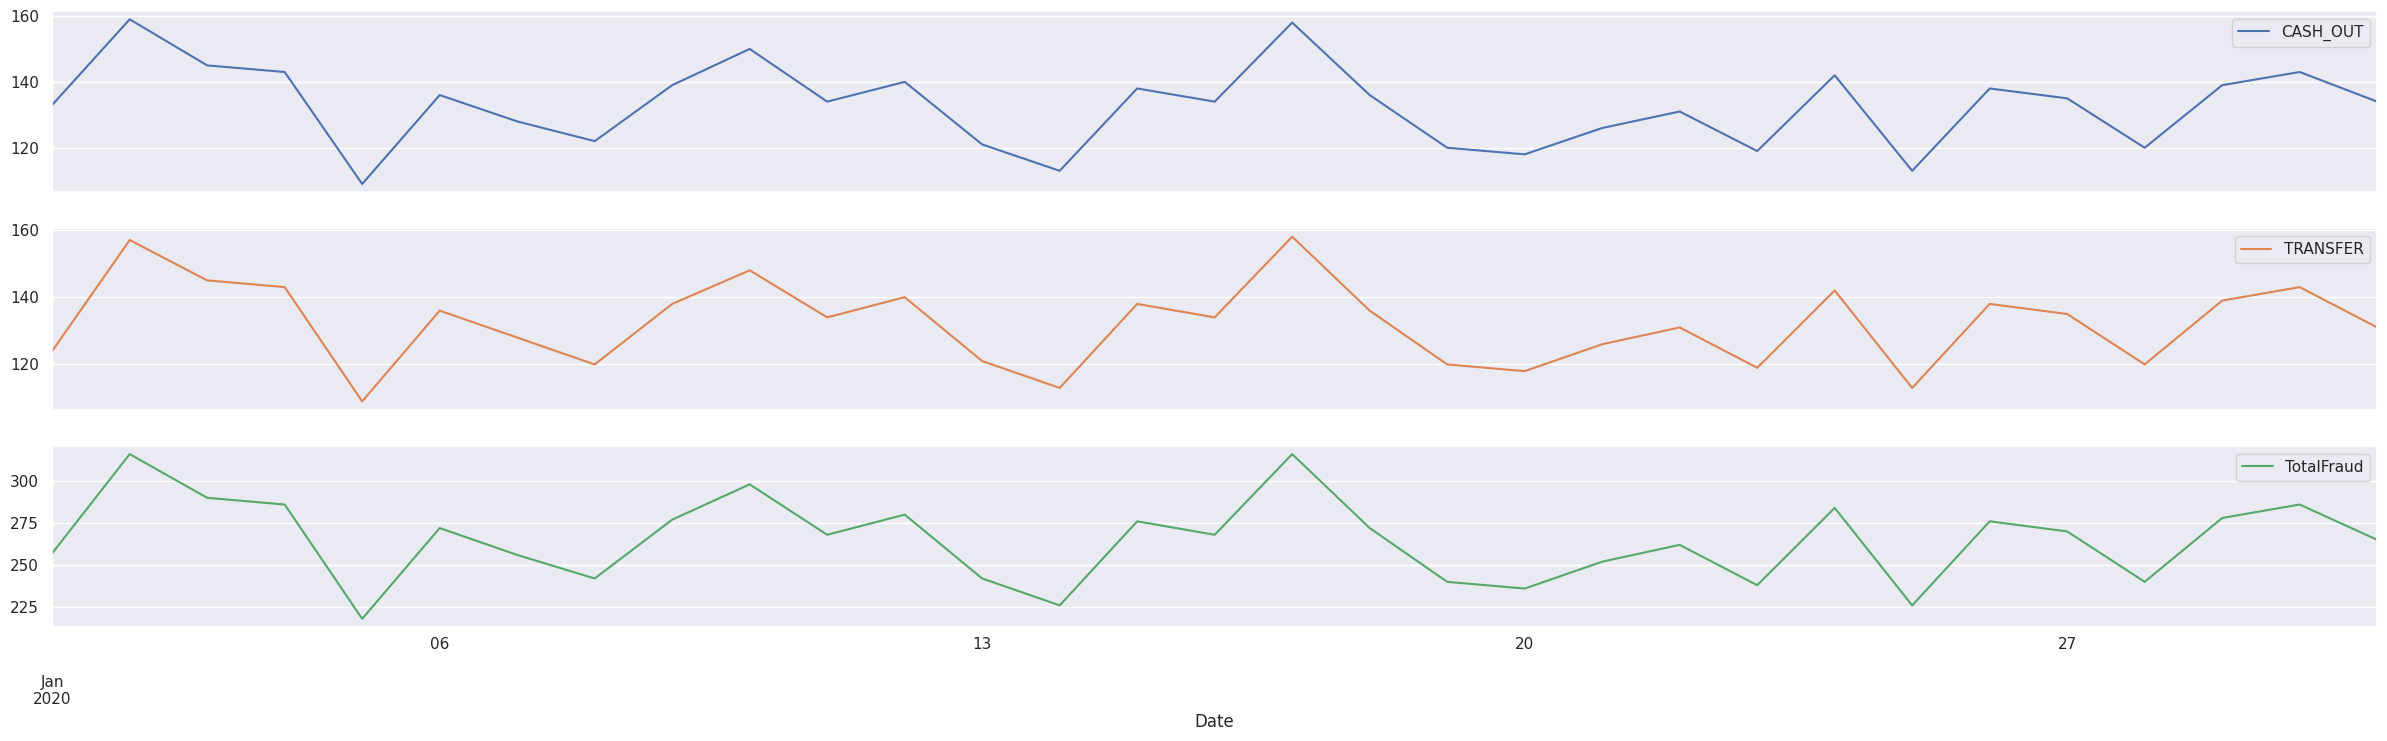

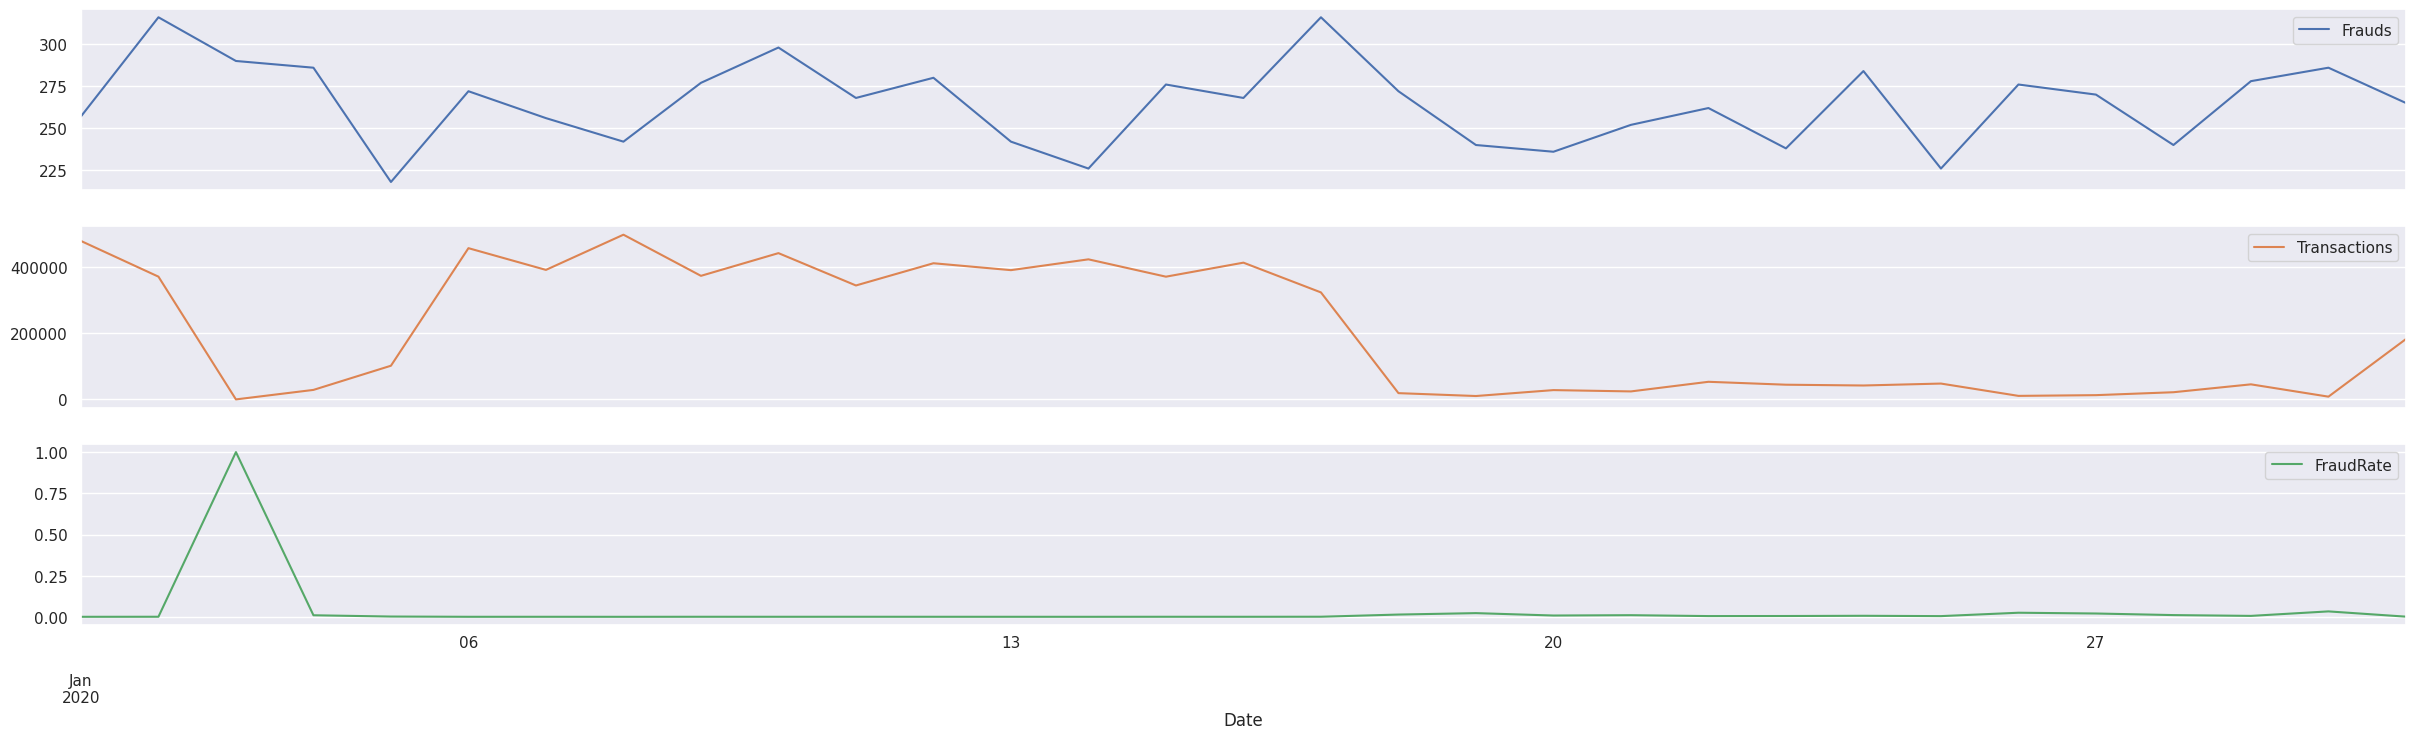

In [ ]:
import datetime
import random
import matplotlib.pyplot as plt

axes = Type.plot.line(subplots=True)
type(axes)

axes = FraudsbyDate.plot.line(subplots=True)
type(axes)

#Based on the plots below, transactions are loosing the frequency around 17th of January.

In [ ]:
#I can use the cross tab to examine again fraud by type at frequency and percentage for entire set.
pd.crosstab(Import['type'], Import['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
pd.crosstab(Import['type'], Import['isFraud'],normalize='index')\
    .round(4)*100

isFraud,0,1
type,,
CASH_IN,100.00,0.00
CASH_OUT,99.82,0.18
DEBIT,100.00,0.00
PAYMENT,100.00,0.00
TRANSFER,99.23,0.77


# Assumptions:

Based on the results above, there is no recorded Fraud associated with **Payments** category under variable **type**.

The publication: "PAYSIM: A FINANCIAL MOBILE MONEY SIMULATOR FOR FRAUD DETECTION" defines type of transactions in the following way.

1. CASH-IN is the process of increasing the balance of account by paying in cash to a merchant.

2. CASH-OUT is the opposite process of CASH-IN, it means to withdraw cash from a merchant which                            decreases the balance of the account.
   
3. DEBIT is the opposite process of CASH-OUT and involves sending the money from the mobile money                         service to a bank account.

4. PAYMENT is the process of paying for goods or services to merchants which decreases the balance of                            the account and increases the balance of the receiver.
                     
5. TRANSFER is the process of sending money to another user of the service through the mobile money platform.
                            
Based on the definitions (1-5), I made an assumption that the money moves to either increase or decrease the balance of the receiver. Receiver is defined by me, as an entity that holds money for me or receives the money from me for goods.
                            
IncreaseReceiverBalance, is defined by me, as making payment to beneficiary, and includes following:
-CASH-IN
-DEBIT
-PAYMENT
-TRANSFER

DecreaseReceiverBalance, is defined by me as **not** making payment to beneficiary, and includes following:
-CASH-OUT   

Therefore, to follow the purpose of this study, and identify customers who make payments to multiple beneficiaries, data should be filtered by definition set for: IncreaseReceiverBalance. Therefore, CASH-OUT should be excluded from my study.

Based on the above analysis, I know that fraud occurs only for two 'type' categories: Cash-Out and Transfer. Therefore, I know it would make more sense to include entire dataset for the analysis. I can test both approaches later.

## Follow the money

In [ ]:
#I am setting here new variable describing the direction in which money moves:

Import['MoneyMoves'] = np.where(Import["type"] == "CASH_OUT" , "DecreaseReceiverBalance", "IncreaseReceiverBalance")
Import.sort_values("Date")

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
649237,35,2020-01-01,2020-01-01 11:00:00,11,1,1,2020,C68806075,TRANSFER,C1825802946,10033.00,951168.19,0.00,2837305.89,3788474.08,0,0,1,IncreaseReceiverBalance
440030,18,2020-01-01,2020-01-01 18:00:00,18,1,1,2020,C431495509,PAYMENT,M1496061066,0.00,5631.10,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance
440031,18,2020-01-01,2020-01-01 18:00:00,18,1,1,2020,C534678625,CASH_IN,C109053045,53123.00,450593.84,503716.84,0.00,0.00,0,0,1,IncreaseReceiverBalance
440032,18,2020-01-01,2020-01-01 18:00:00,18,1,1,2020,C1364949131,PAYMENT,M149987652,503716.84,9353.18,494363.66,0.00,0.00,0,0,1,IncreaseReceiverBalance
440033,18,2020-01-01,2020-01-01 18:00:00,18,1,1,2020,C834759828,PAYMENT,M1519862601,417155.35,17166.95,399988.40,0.00,0.00,0,0,1,IncreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C1390118541,CASH_OUT,C305934,378466.66,272851.65,105615.01,3722486.90,3995338.54,0,0,1,DecreaseReceiverBalance
121403,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C105257953,PAYMENT,M1685965670,388787.04,10320.38,378466.66,0.00,0.00,0,0,1,IncreaseReceiverBalance
121402,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C2103011621,PAYMENT,M68785197,157312.40,12858.73,144453.67,0.00,0.00,0,0,1,IncreaseReceiverBalance
121378,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C1681490322,CASH_OUT,C1744706134,13221.00,169252.26,0.00,1607117.26,1800200.59,0,0,1,DecreaseReceiverBalance


In [ ]:
#Now that I have made my own assumptions, the fraud cases are distributed nearly equally between two categories of the direction of how the money moves.
#I can now split the dataset by those categories, and create the rule for : IncreaseReceiverBalance set.

pd.crosstab(Import['MoneyMoves'], Import['isFraud'])

isFraud,0,1
MoneyMoves,,
DecreaseReceiverBalance,2233384,4116
IncreaseReceiverBalance,4121023,4097


In [ ]:
pd.crosstab(Import['MoneyMoves'], Import['isFraud'],normalize='index')\
    .round(4)*100

isFraud,0,1
MoneyMoves,,
DecreaseReceiverBalance,99.82,0.18
IncreaseReceiverBalance,99.90,0.10


In [ ]:
#Setting the data for this study:
IncreaseBalance = Import[Import["MoneyMoves"] == "IncreaseReceiverBalance"]
IncreaseBalance.sort_values("Date")

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
648175,35,2020-01-01,2020-01-01 11:00:00,11,1,1,2020,C570435536,PAYMENT,M721534967,69981.00,17703.29,52277.71,0.00,0.00,0,0,1,IncreaseReceiverBalance
445005,19,2020-01-01,2020-01-01 19:00:00,19,1,1,2020,C931943073,TRANSFER,C1367535639,0.00,2608845.32,0.00,3422618.96,6051674.86,0,0,1,IncreaseReceiverBalance
445004,19,2020-01-01,2020-01-01 19:00:00,19,1,1,2020,C1246541290,TRANSFER,C1832323051,0.00,223840.31,0.00,240841.60,627389.69,0,0,1,IncreaseReceiverBalance
445003,19,2020-01-01,2020-01-01 19:00:00,19,1,1,2020,C493525115,TRANSFER,C2000082264,0.00,313672.53,0.00,559920.22,873592.75,0,0,1,IncreaseReceiverBalance
445002,19,2020-01-01,2020-01-01 19:00:00,19,1,1,2020,C1690879213,TRANSFER,C776308039,0.00,964040.76,0.00,3029577.60,4264009.70,0,0,1,IncreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118508,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C1358456486,PAYMENT,M297931071,0.00,16492.08,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance
118509,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C1400941483,PAYMENT,M830169585,240.00,13454.36,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance
118511,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C602884796,PAYMENT,M1977905305,20062.00,1162.74,18899.26,0.00,0.00,0,0,1,IncreaseReceiverBalance
118494,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C1366173487,CASH_IN,C1570470306,126263.00,170594.55,296857.55,28421.02,0.00,0,0,1,IncreaseReceiverBalance


In [ ]:
#I can also check if there are any missing values and it looks like the data is complete.
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(IncreaseBalance)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,datetime64[ns],datetime64[ns],int64,int64,int64,int64,object,object,object,float64,float64,float64,float64,float64,int64,int64,int64,object


In [ ]:
#I would like to know, how many unique originators am I dealing with?
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(IncreaseBalance)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
Total,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120,4125120
Uniques,743,31,728,24,31,1,1,4121245,4,2633002,1632976,3341668,2448273,1734353,1611987,2,2,1,1


In [ ]:
#There are 3,875 unique originators.
x=4125120-4121245
x

3875

In [ ]:
#I can add frequency count for each originator to see how many time does it repeat in the data
df=IncreaseBalance.copy()
df['freq'] = df.groupby('nameOrig')['nameOrig'].transform('count')
df.sort_values("freq",  ascending=False)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,freq
361126,17,2020-01-01,2020-01-01 17:00:00,17,1,1,2020,C1065307291,PAYMENT,M1175397032,819637.87,5530.99,814106.88,0.00,0.00,0,0,1,IncreaseReceiverBalance,3
53297,9,2020-01-31,2020-01-31 09:00:00,9,31,1,2020,C400299098,PAYMENT,M885272395,91105.15,2142.13,88963.02,0.00,0.00,0,0,1,IncreaseReceiverBalance,3
1432799,139,2020-01-06,2020-01-06 19:00:00,19,6,1,2020,C1999539787,PAYMENT,M216391378,17222.00,28653.25,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance,3
5375101,376,2020-01-16,2020-01-16 16:00:00,16,16,1,2020,C363736674,PAYMENT,M1915659404,35749.00,43108.62,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance,3
6252835,596,2020-01-25,2020-01-25 20:00:00,20,25,1,2020,C1462946854,CASH_IN,C569031032,10580.00,113062.25,123642.25,538446.03,425383.78,0,0,1,IncreaseReceiverBalance,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139953,184,2020-01-08,2020-01-08 16:00:00,16,8,1,2020,C428871280,CASH_IN,C185554992,972515.08,131411.00,1103926.08,248940.56,117529.55,0,0,1,IncreaseReceiverBalance,1
2139954,184,2020-01-08,2020-01-08 16:00:00,16,8,1,2020,C651260363,CASH_IN,C661918685,1103926.08,66852.73,1170778.81,108907.65,42054.92,0,0,1,IncreaseReceiverBalance,1
2139955,184,2020-01-08,2020-01-08 16:00:00,16,8,1,2020,C418279910,CASH_IN,C1643419160,1170778.81,69308.12,1240086.93,353602.62,284294.50,0,0,1,IncreaseReceiverBalance,1
2139956,184,2020-01-08,2020-01-08 16:00:00,16,8,1,2020,C1480561025,CASH_IN,C1469323534,1240086.93,52404.75,1292491.67,931499.77,830853.24,0,0,1,IncreaseReceiverBalance,1


In [ ]:
#It looks like, the most amount of time a unique originaor transacts is 3 times.
pd.crosstab(df['freq'], df['counter'])

counter,1
freq,
1,4117376
2,7726
3,18


# Methodology

## Population nr 1: IncreaseBalance

Based on these results, I know that most of the transactions are by unique originator. Therefore, it will be more efficient to only look at duplicated transactions. I want to first examine if there is any relationship between days between transactions and fraud.

In [ ]:
#Frst method to list all transactions with repeating originators.
ids = IncreaseBalance["nameOrig"]
RepeatingOriginatorsIB=IncreaseBalance[ids.isin(ids[ids.duplicated()])]
RepeatingOriginatorsIB.sort_values(['nameOrig'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance
1946954,177,2020-01-07,2020-01-07 09:00:00,9,7,1,2020,C1001770944,CASH_IN,C28305284,4127754.07,316592.53,4444346.59,1082166.18,765573.65,0,0,1,IncreaseReceiverBalance
2427427,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C1001770944,PAYMENT,M815802181,68090.09,31373.24,36716.85,0.00,0.00,0,0,1,IncreaseReceiverBalance
5457434,379,2020-01-16,2020-01-16 19:00:00,19,16,1,2020,C1002027777,TRANSFER,C23975599,0.00,8373.83,0.00,1578552.83,1586926.66,0,0,1,IncreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559763,260,2020-01-11,2020-01-11 20:00:00,20,11,1,2020,C998394501,PAYMENT,M1419029815,51095.00,1908.47,49186.53,0.00,0.00,0,0,1,IncreaseReceiverBalance
5975256,407,2020-01-17,2020-01-17 23:00:00,23,17,1,2020,C998869760,CASH_IN,C830922963,3593812.48,91606.40,3685418.88,128964.07,37357.66,0,0,1,IncreaseReceiverBalance
1574705,155,2020-01-06,2020-01-06 11:00:00,11,6,1,2020,C998869760,PAYMENT,M1335651626,60016.00,8732.07,51283.93,0.00,0.00,0,0,1,IncreaseReceiverBalance
1499368,143,2020-01-06,2020-01-06 23:00:00,23,6,1,2020,C999598029,PAYMENT,M571344826,51931.00,3668.93,48262.07,0.00,0.00,0,0,1,IncreaseReceiverBalance


In [ ]:
RepeatingOriginatorsIB.sort_values(['nameOrig', 'Day'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance
1946954,177,2020-01-07,2020-01-07 09:00:00,9,7,1,2020,C1001770944,CASH_IN,C28305284,4127754.07,316592.53,4444346.59,1082166.18,765573.65,0,0,1,IncreaseReceiverBalance
2427427,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C1001770944,PAYMENT,M815802181,68090.09,31373.24,36716.85,0.00,0.00,0,0,1,IncreaseReceiverBalance
5457434,379,2020-01-16,2020-01-16 19:00:00,19,16,1,2020,C1002027777,TRANSFER,C23975599,0.00,8373.83,0.00,1578552.83,1586926.66,0,0,1,IncreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559763,260,2020-01-11,2020-01-11 20:00:00,20,11,1,2020,C998394501,PAYMENT,M1419029815,51095.00,1908.47,49186.53,0.00,0.00,0,0,1,IncreaseReceiverBalance
1574705,155,2020-01-06,2020-01-06 11:00:00,11,6,1,2020,C998869760,PAYMENT,M1335651626,60016.00,8732.07,51283.93,0.00,0.00,0,0,1,IncreaseReceiverBalance
5975256,407,2020-01-17,2020-01-17 23:00:00,23,17,1,2020,C998869760,CASH_IN,C830922963,3593812.48,91606.40,3685418.88,128964.07,37357.66,0,0,1,IncreaseReceiverBalance
1499368,143,2020-01-06,2020-01-06 23:00:00,23,6,1,2020,C999598029,PAYMENT,M571344826,51931.00,3668.93,48262.07,0.00,0.00,0,0,1,IncreaseReceiverBalance


In [ ]:
#Here I am creating difference between dates of consecutive transactions.
df_diff=RepeatingOriginatorsIB.copy()
df_diff['diff'] = df_diff.sort_values(['nameOrig', 'Day']).groupby('nameOrig')['Day'].diff()
df_diff.sort_values(['nameOrig', 'Day'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance,NaN
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance,1.0
1946954,177,2020-01-07,2020-01-07 09:00:00,9,7,1,2020,C1001770944,CASH_IN,C28305284,4127754.07,316592.53,4444346.59,1082166.18,765573.65,0,0,1,IncreaseReceiverBalance,NaN
2427427,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C1001770944,PAYMENT,M815802181,68090.09,31373.24,36716.85,0.00,0.00,0,0,1,IncreaseReceiverBalance,1.0
5457434,379,2020-01-16,2020-01-16 19:00:00,19,16,1,2020,C1002027777,TRANSFER,C23975599,0.00,8373.83,0.00,1578552.83,1586926.66,0,0,1,IncreaseReceiverBalance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559763,260,2020-01-11,2020-01-11 20:00:00,20,11,1,2020,C998394501,PAYMENT,M1419029815,51095.00,1908.47,49186.53,0.00,0.00,0,0,1,IncreaseReceiverBalance,3.0
1574705,155,2020-01-06,2020-01-06 11:00:00,11,6,1,2020,C998869760,PAYMENT,M1335651626,60016.00,8732.07,51283.93,0.00,0.00,0,0,1,IncreaseReceiverBalance,NaN
5975256,407,2020-01-17,2020-01-17 23:00:00,23,17,1,2020,C998869760,CASH_IN,C830922963,3593812.48,91606.40,3685418.88,128964.07,37357.66,0,0,1,IncreaseReceiverBalance,11.0
1499368,143,2020-01-06,2020-01-06 23:00:00,23,6,1,2020,C999598029,PAYMENT,M571344826,51931.00,3668.93,48262.07,0.00,0.00,0,0,1,IncreaseReceiverBalance,NaN


In [ ]:
#Becasue of how the output is calculated, I like to remove duplicates just so
#I can focus on counting originators by calculated day difference.
nodup = df_diff.dropna(subset=['diff'])
nodup

#BTW- 3,875  is my unique originator count for my group "IncreaseReceiverBalance"

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
95,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C835773569,TRANSFER,C1359044626,0.00,710544.77,0.00,738531.50,16518.36,0,0,1,IncreaseReceiverBalance,23.0
2404,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1548962651,DEBIT,C1529115495,19098.00,9769.90,9328.10,67268.02,52845.35,0,0,1,IncreaseReceiverBalance,2.0
2727,2,2020-01-31,2020-01-31 02:00:00,2,31,1,2020,C503879157,PAYMENT,M449105069,1077.00,191.73,885.27,0.00,0.00,0,0,1,IncreaseReceiverBalance,25.0
3934,3,2020-01-31,2020-01-31 03:00:00,3,31,1,2020,C1963943166,CASH_IN,C11003494,3091709.85,118387.74,3210097.59,11375381.12,11157336.25,0,0,1,IncreaseReceiverBalance,11.0
3948,3,2020-01-31,2020-01-31 03:00:00,3,31,1,2020,C1823354445,CASH_IN,C224063653,4915063.33,194926.14,5109989.47,291562.70,96636.56,0,0,1,IncreaseReceiverBalance,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354704,709,2020-01-30,2020-01-30 13:00:00,13,30,1,2020,C469551489,PAYMENT,M1366894368,300441.00,7134.37,293306.63,0.00,0.00,0,0,1,IncreaseReceiverBalance,14.0
6356969,710,2020-01-30,2020-01-30 14:00:00,14,30,1,2020,C1973858274,CASH_IN,C1897870969,512.00,156995.16,157507.16,171281.21,14286.06,0,0,1,IncreaseReceiverBalance,16.0
6359206,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C1869761549,CASH_IN,C1354003128,31151.00,181794.46,212945.46,0.00,0.00,0,0,1,IncreaseReceiverBalance,14.0
6359603,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C860534455,PAYMENT,M1113481787,1082.00,2714.85,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance,19.0


In [ ]:
#Here I am couting which originators transacted within 1 day, 2 days, and so on.
nameOrigdiff = nodup.groupby(['diff']).nameOrig.value_counts().unstack().fillna(0)
nameOrigdiff.sort_values(['diff'])

nameOrig,C100025963,C1001770944,C1002027777,C1002875710,C1003111861,C1003352048,C1003390396,C100367851,C1004685418,C1004849666,C1005243390,C1005754324,C1006085253,C1006478345,C1006639408,C100758345,C1007679575,C1008178625,C1008581294,C1008648937,C1008834487,C1009183599,C1009378193,C1011359111,C1011756176,C1011887288,C1012240507,C1012627876,C1012810122,C1012825031,C1013124766,C1013696655,C1013984090,C1014862254,C1015032979,C1015805832,C1015880516,C1015984215,C1016549397,C1016778873,C1016934729,C1018213648,C1018359939,C1019814688,C1020371503,C1020951962,C1021736664,C102206571,C1022068250,C1022264337,C1022299134,C1023171688,C1023671742,C1024448519,C1025084361,C1025369363,C1025684428,C1026254665,C1028192400,C1028455520,C102946146,C1029713918,C1030485304,C1030761698,C1030817908,C1031460541,C1032392212,C1032521386,C1032553396,C1032840178,C103372143,C1034440642,C1035199278,C1035494577,C1036440577,...,C965351740,C966421618,C966754077,C967058524,C968218473,C96971653,C970488620,C970779252,C971278158,C971280471,C97172257,C972407129,C972464930,C972733682,C972946191,C97308318,C973424794,C974741402,C974987516,C975460070,C975861210,C975969069,C976332529,C976450662,C976818249,C976841129,C977565568,C977691030,C97787003,C978009734,C978274570,C978690875,C979934928,C980237970,C980373287,C980410841,C98120519,C981316169,C981868944,C981997803,C982324965,C98304544,C984886138,C986536137,C98658157,C98707923,C98750687,C987995230,C988115907,C988366587,C988468310,C988604628,C98867646,C988782905,C98988155,C990422673,C990727065,C991095421,C991189718,C991713161,C992563138,C993967595,C994253420,C994773132,C99483815,C994864343,C994870328,C995002169,C995334269,C996153753,C996354597,C996729697,C998394501,C998869760,C999598029
diff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [ ]:
#Here I am adding all coulmns together to get the total number occurances of all originators per day difference:
#The last column C was created:
df=nameOrigdiff.copy()
df['C'] = df.sum(axis=1)
df.sort_values(['diff'])

nameOrig,C100025963,C1001770944,C1002027777,C1002875710,C1003111861,C1003352048,C1003390396,C100367851,C1004685418,C1004849666,C1005243390,C1005754324,C1006085253,C1006478345,C1006639408,C100758345,C1007679575,C1008178625,C1008581294,C1008648937,C1008834487,C1009183599,C1009378193,C1011359111,C1011756176,C1011887288,C1012240507,C1012627876,C1012810122,C1012825031,C1013124766,C1013696655,C1013984090,C1014862254,C1015032979,C1015805832,C1015880516,C1015984215,C1016549397,C1016778873,C1016934729,C1018213648,C1018359939,C1019814688,C1020371503,C1020951962,C1021736664,C102206571,C1022068250,C1022264337,C1022299134,C1023171688,C1023671742,C1024448519,C1025084361,C1025369363,C1025684428,C1026254665,C1028192400,C1028455520,C102946146,C1029713918,C1030485304,C1030761698,C1030817908,C1031460541,C1032392212,C1032521386,C1032553396,C1032840178,C103372143,C1034440642,C1035199278,C1035494577,C1036440577,...,C966421618,C966754077,C967058524,C968218473,C96971653,C970488620,C970779252,C971278158,C971280471,C97172257,C972407129,C972464930,C972733682,C972946191,C97308318,C973424794,C974741402,C974987516,C975460070,C975861210,C975969069,C976332529,C976450662,C976818249,C976841129,C977565568,C977691030,C97787003,C978009734,C978274570,C978690875,C979934928,C980237970,C980373287,C980410841,C98120519,C981316169,C981868944,C981997803,C982324965,C98304544,C984886138,C986536137,C98658157,C98707923,C98750687,C987995230,C988115907,C988366587,C988468310,C988604628,C98867646,C988782905,C98988155,C990422673,C990727065,C991095421,C991189718,C991713161,C992563138,C993967595,C994253420,C994773132,C99483815,C994864343,C994870328,C995002169,C995334269,C996153753,C996354597,C996729697,C998394501,C998869760,C999598029,C
diff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,402.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

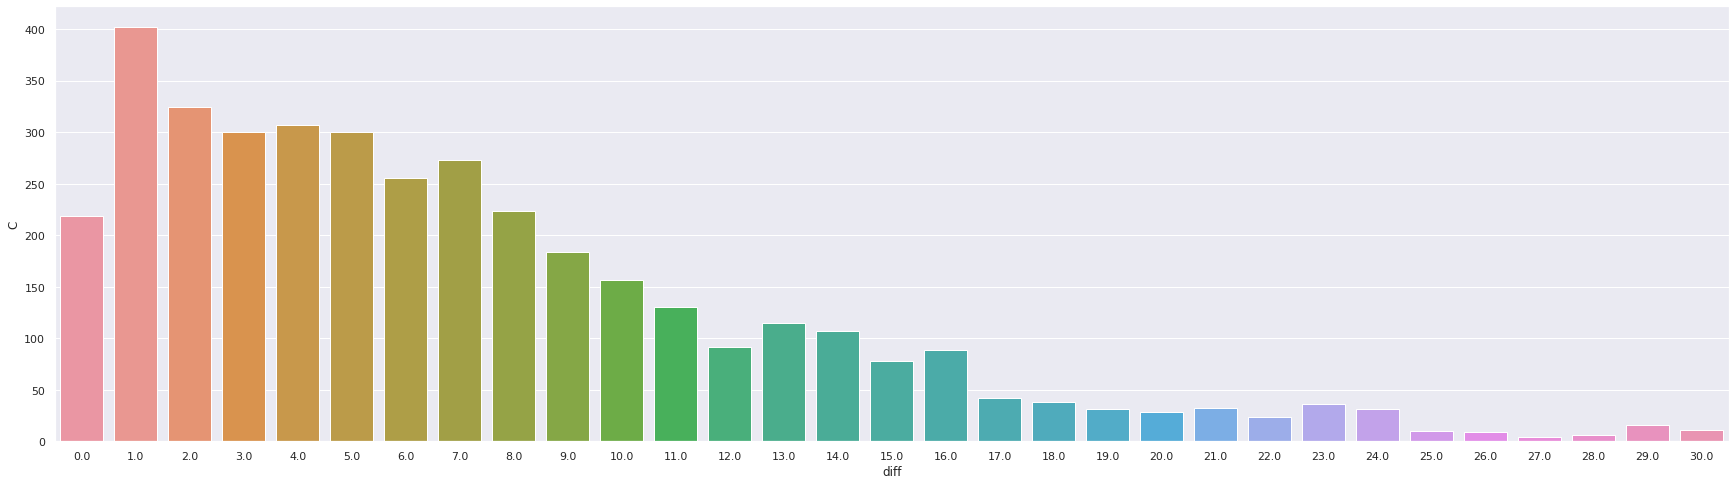

In [ ]:
# I want to view the distribution of frequency of originators transacting within same day, next day, 3 days...30 days.

# Based on the plot below, it looks like, most originators transact within 1 day.

import seaborn as sns
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(x=df.index,y=df.C)
plt.show()

In [ ]:
#I need to fill na in my days difference dataset with some other arbitrary value so I can view the frequency of fraud.
df2=df_diff.copy()
df2['diff'] = df2['diff'].fillna(99999)
df2

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
95,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C835773569,TRANSFER,C1359044626,0.00,710544.77,0.00,738531.50,16518.36,0,0,1,IncreaseReceiverBalance,23.0
2404,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1548962651,DEBIT,C1529115495,19098.00,9769.90,9328.10,67268.02,52845.35,0,0,1,IncreaseReceiverBalance,2.0
2727,2,2020-01-31,2020-01-31 02:00:00,2,31,1,2020,C503879157,PAYMENT,M449105069,1077.00,191.73,885.27,0.00,0.00,0,0,1,IncreaseReceiverBalance,25.0
3934,3,2020-01-31,2020-01-31 03:00:00,3,31,1,2020,C1963943166,CASH_IN,C11003494,3091709.85,118387.74,3210097.59,11375381.12,11157336.25,0,0,1,IncreaseReceiverBalance,11.0
3948,3,2020-01-31,2020-01-31 03:00:00,3,31,1,2020,C1823354445,CASH_IN,C224063653,4915063.33,194926.14,5109989.47,291562.70,96636.56,0,0,1,IncreaseReceiverBalance,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354704,709,2020-01-30,2020-01-30 13:00:00,13,30,1,2020,C469551489,PAYMENT,M1366894368,300441.00,7134.37,293306.63,0.00,0.00,0,0,1,IncreaseReceiverBalance,14.0
6356969,710,2020-01-30,2020-01-30 14:00:00,14,30,1,2020,C1973858274,CASH_IN,C1897870969,512.00,156995.16,157507.16,171281.21,14286.06,0,0,1,IncreaseReceiverBalance,16.0
6359206,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C1869761549,CASH_IN,C1354003128,31151.00,181794.46,212945.46,0.00,0.00,0,0,1,IncreaseReceiverBalance,14.0
6359603,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C860534455,PAYMENT,M1113481787,1082.00,2714.85,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance,19.0


In [ ]:
isFraud = df2[df2["isFraud"] == 1]
isFraud.head(2)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
1496506,142,2020-01-06,2020-01-06 22:00:00,22,6,1,2020,C171834973,TRANSFER,C1249377837,346374.54,346374.54,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,99999.0
2531840,205,2020-01-09,2020-01-09 13:00:00,13,9,1,2020,C1863683348,TRANSFER,C1011918912,216179.15,216179.15,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,99999.0


In [ ]:
t1=pd.crosstab(isFraud['diff'], isFraud['type'])
t1

type,TRANSFER
diff,
2.0,1
11.0,1
99999.0,4


In [ ]:
listed = isFraud[isFraud["diff"] != 99999]
listed.head()

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
3980908,297,2020-01-12,2020-01-12 09:00:00,9,12,1,2020,C483009518,TRANSFER,C1272462265,3105902.49,3105902.49,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,2.0
5980078,408,2020-01-17,2020-01-17 00:00:00,0,17,1,2020,C1191696703,TRANSFER,C1815124854,2567602.10,2567602.10,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,11.0


In [ ]:
isNotFraud = df2[df2["isFraud"] != 1]
isNotFraud.head(2)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
95,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C835773569,TRANSFER,C1359044626,0.0,710544.77,0.0,738531.50,16518.36,0,0,1,IncreaseReceiverBalance,23.0
2404,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1548962651,DEBIT,C1529115495,19098.0,9769.90,9328.1,67268.02,52845.35,0,0,1,IncreaseReceiverBalance,2.0


In [ ]:
t1=pd.crosstab(isNotFraud['diff'], isNotFraud['type'])
t1

type,CASH_IN,DEBIT,PAYMENT,TRANSFER
diff,,,,
0.0,73,5,110,31
1.0,145,5,205,47
2.0,97,2,187,37
3.0,94,6,158,42
4.0,100,4,159,44
5.0,112,4,142,42
6.0,98,2,127,29
7.0,75,1,165,32
8.0,82,2,119,21


### Conclusion for population nr. 1: IncreaseReceiverBalance


The population analyzed above pertained data Import filtered by IncreaseReceiverBalance, which is defined by me, as making payment to beneficiary, and includes following: -CASH-IN -DEBIT -PAYMENT -TRANSFER

Based on my analysis, there is no originators that make payments to multiple beneficiaries within 24 hours.
There is one originator who made payments to multiple beneficiaries within 2 days: C483009518, 11 days: C1191696703 and remaining transactions are the pairs for the listed ones and no time difference can be calculated further.

## Population nr 2: Entire Set

The following steps are copies of steps above, but for entire set, so including both cash out and transfers.

In [ ]:
#Frst method to list all transactions with repeating originators.
ids = Import["nameOrig"]
RepeatingOriginatorsES=Import[ids.isin(ids[ids.duplicated()])]
RepeatingOriginatorsES.sort_values(['nameOrig'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance
279050,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C1000442951,CASH_OUT,C994420111,57101.00,44373.09,12727.91,83181.14,0.00,0,0,1,DecreaseReceiverBalance
4982860,352,2020-01-15,2020-01-15 16:00:00,16,15,1,2020,C1000442951,CASH_IN,C642896648,8737581.06,146953.48,8884534.54,596519.76,449566.28,0,0,1,IncreaseReceiverBalance
3925189,285,2020-01-12,2020-01-12 21:00:00,21,12,1,2020,C1000947901,CASH_OUT,C244769530,0.00,188876.87,0.00,639830.17,828707.04,0,0,1,DecreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634297,209,2020-01-09,2020-01-09 17:00:00,17,9,1,2020,C999849840,CASH_OUT,C885377382,21.00,165724.25,0.00,2526597.36,2692321.61,0,0,1,DecreaseReceiverBalance
2413881,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C999951360,CASH_OUT,C2035259819,0.00,73863.12,0.00,477842.77,551705.88,0,0,1,DecreaseReceiverBalance
1612862,156,2020-01-06,2020-01-06 12:00:00,12,6,1,2020,C999951360,CASH_OUT,C728588351,0.00,170525.30,0.00,212287.42,382812.72,0,0,1,DecreaseReceiverBalance
4215892,305,2020-01-13,2020-01-13 17:00:00,17,13,1,2020,C999972841,CASH_IN,C523360505,200279.00,32148.48,232427.48,9340.77,0.00,0,0,1,IncreaseReceiverBalance


In [ ]:
RepeatingOriginatorsES.sort_values(['nameOrig', 'Day'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance
279050,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C1000442951,CASH_OUT,C994420111,57101.00,44373.09,12727.91,83181.14,0.00,0,0,1,DecreaseReceiverBalance
4982860,352,2020-01-15,2020-01-15 16:00:00,16,15,1,2020,C1000442951,CASH_IN,C642896648,8737581.06,146953.48,8884534.54,596519.76,449566.28,0,0,1,IncreaseReceiverBalance
3123272,236,2020-01-10,2020-01-10 20:00:00,20,10,1,2020,C1000947901,CASH_IN,C1908979473,4011696.45,29929.79,4041626.24,72964.41,43034.62,0,0,1,IncreaseReceiverBalance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087532,301,2020-01-13,2020-01-13 13:00:00,13,13,1,2020,C999849840,PAYMENT,M1534003666,0.00,16022.03,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance
1612862,156,2020-01-06,2020-01-06 12:00:00,12,6,1,2020,C999951360,CASH_OUT,C728588351,0.00,170525.30,0.00,212287.42,382812.72,0,0,1,DecreaseReceiverBalance
2413881,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C999951360,CASH_OUT,C2035259819,0.00,73863.12,0.00,477842.77,551705.88,0,0,1,DecreaseReceiverBalance
4060340,300,2020-01-12,2020-01-12 12:00:00,12,12,1,2020,C999972841,CASH_OUT,C1934233468,0.00,180065.16,0.00,951897.18,1131962.34,0,0,1,DecreaseReceiverBalance


In [ ]:
#Here I am creating difference between dates of consecutive transactions.
df_diffES=RepeatingOriginatorsES.copy()
df_diffES['diff'] = df_diffES.sort_values(['nameOrig', 'Day']).groupby('nameOrig')['Day'].diff()
df_diffES.sort_values(['nameOrig', 'Day'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
3359372,254,2020-01-11,2020-01-11 14:00:00,14,11,1,2020,C100025963,CASH_IN,C1702915472,51809.00,21813.13,73622.13,1657470.21,1635657.07,0,0,1,IncreaseReceiverBalance,NaN
3699311,277,2020-01-12,2020-01-12 13:00:00,13,12,1,2020,C100025963,CASH_IN,C1615713927,797.00,68949.69,69746.69,312817.27,243867.58,0,0,1,IncreaseReceiverBalance,1.0
279050,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C1000442951,CASH_OUT,C994420111,57101.00,44373.09,12727.91,83181.14,0.00,0,0,1,DecreaseReceiverBalance,NaN
4982860,352,2020-01-15,2020-01-15 16:00:00,16,15,1,2020,C1000442951,CASH_IN,C642896648,8737581.06,146953.48,8884534.54,596519.76,449566.28,0,0,1,IncreaseReceiverBalance,14.0
3123272,236,2020-01-10,2020-01-10 20:00:00,20,10,1,2020,C1000947901,CASH_IN,C1908979473,4011696.45,29929.79,4041626.24,72964.41,43034.62,0,0,1,IncreaseReceiverBalance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087532,301,2020-01-13,2020-01-13 13:00:00,13,13,1,2020,C999849840,PAYMENT,M1534003666,0.00,16022.03,0.00,0.00,0.00,0,0,1,IncreaseReceiverBalance,4.0
1612862,156,2020-01-06,2020-01-06 12:00:00,12,6,1,2020,C999951360,CASH_OUT,C728588351,0.00,170525.30,0.00,212287.42,382812.72,0,0,1,DecreaseReceiverBalance,NaN
2413881,202,2020-01-08,2020-01-08 10:00:00,10,8,1,2020,C999951360,CASH_OUT,C2035259819,0.00,73863.12,0.00,477842.77,551705.88,0,0,1,DecreaseReceiverBalance,2.0
4060340,300,2020-01-12,2020-01-12 12:00:00,12,12,1,2020,C999972841,CASH_OUT,C1934233468,0.00,180065.16,0.00,951897.18,1131962.34,0,0,1,DecreaseReceiverBalance,NaN


In [ ]:
#Becasue of how the output is calculated, I like to remove duplicates just so
#I can focus on counting originators by calculated day difference.
nodupES = df_diffES.dropna(subset=['diff'])
nodupES

#BTW- 9,313   is my unique originator count for "Entire Set"

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
95,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C835773569,TRANSFER,C1359044626,0.00,710544.77,0.00,738531.50,16518.36,0,0,1,IncreaseReceiverBalance,23.0
834,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1101598632,CASH_OUT,C248609774,0.00,173597.57,0.00,3104598.86,6453430.91,0,0,1,DecreaseReceiverBalance,25.0
835,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1032568028,CASH_OUT,C667346055,0.00,77642.84,0.00,416103.33,9291619.62,0,0,1,DecreaseReceiverBalance,16.0
1241,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1892869131,DEBIT,C33524623,152809.00,3039.84,149769.16,2079710.62,1517262.16,0,0,1,IncreaseReceiverBalance,7.0
2165,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1859823482,CASH_IN,C1529115495,6668468.08,201342.13,6869810.21,268157.57,67268.02,0,0,1,IncreaseReceiverBalance,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359886,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C876817986,PAYMENT,M2021251796,38313.00,3470.96,34842.04,0.00,0.00,0,0,1,IncreaseReceiverBalance,8.0
6360204,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C1313642079,TRANSFER,C927206109,110425.00,118688.81,0.00,0.00,118688.81,0,0,1,IncreaseReceiverBalance,29.0
6360821,717,2020-01-30,2020-01-30 21:00:00,21,30,1,2020,C188194996,CASH_OUT,C1210630308,69491.00,40187.86,29303.14,679792.78,719980.63,0,0,1,DecreaseReceiverBalance,29.0
6361231,717,2020-01-30,2020-01-30 21:00:00,21,30,1,2020,C1170262181,CASH_OUT,C1991152940,253420.00,82899.05,170520.95,61709.64,144608.69,0,0,1,DecreaseReceiverBalance,8.0


In [ ]:
#I would like to know, how many unique originators am I dealing with?
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(Import)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves
Total,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
Uniques,743,31,728,24,31,1,1,6353307,5,2722362,1845844,5316900,2682586,3614697,3555499,2,2,1,2


In [ ]:
x=6362620-6353307
x

9313

In [ ]:
#Here I am counting which originators transacted within 1 day, 2 days, and so on.
nameOrigdiffES = nodupES.groupby(['diff']).nameOrig.value_counts().unstack().fillna(0)
nameOrigdiffES.sort_values(['diff'])

nameOrig,C100025963,C1000442951,C1000947901,C1001064466,C1001477354,C1001571964,C1001770944,C1001890218,C1002018924,C1002027777,C100265311,C1002875710,C1003111861,C1003352048,C1003390396,C1003512506,C1003668831,C100367851,C10037435,C1003898117,C1004498978,C1004685418,C1004849666,C1004863218,C1004939913,C1005162369,C1005243390,C1005468625,C1005611537,C1005646800,C1005677495,C1005754324,C1005855752,C1006068198,C1006085253,C1006323448,C1006478345,C1006639408,C100758345,C1007679575,C1007743787,C1007785632,C1007904558,C1008178625,C1008581294,C1008648937,C1008834487,C1008909154,C1009183599,C1009378193,C1009421149,C1010089753,C1010528016,C1010656941,C1010894608,C101102764,C1011359111,C1011526407,C1011575884,C1011756176,C1011887288,C1012240507,C1012627876,C1012681897,C1012695456,C1012810122,C1012825031,C1013124766,C1013306757,C1013485687,C1013518816,C1013537057,C101359786,C1013661633,C1013696655,...,C984886138,C984973800,C985185409,C985605886,C986395448,C986500560,C986536137,C98658157,C986886377,C986954676,C987031096,C987068589,C98707923,C987296164,C98732575,C98750687,C987995230,C988115907,C9883080,C988366587,C988468310,C988604628,C98867646,C988782905,C989191140,C989292509,C989302521,C989355314,C989709828,C98988155,C990023087,C990422673,C990727065,C99072819,C991095421,C991189718,C991330649,C991436048,C991713161,C991927555,C992563138,C993304462,C993516336,C993967595,C994253420,C994513164,C994528996,C994773132,C99483815,C994864343,C994870328,C995002169,C995334269,C995554662,C995567953,C995821459,C996105045,C996153753,C996354597,C996531331,C996729697,C996831282,C99770837,C997921074,C998023735,C998394501,C998869760,C999206758,C999476777,C999598029,C999741107,C999741114,C999849840,C999951360,C999972841
diff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [ ]:
#Here I am adding all coulmns together to get the total number occurances of all originators per day difference:
#The lact column C was created:
df=nameOrigdiffES.copy()
df['C'] = df.sum(axis=1)
df.sort_values(['diff'])

nameOrig,C100025963,C1000442951,C1000947901,C1001064466,C1001477354,C1001571964,C1001770944,C1001890218,C1002018924,C1002027777,C100265311,C1002875710,C1003111861,C1003352048,C1003390396,C1003512506,C1003668831,C100367851,C10037435,C1003898117,C1004498978,C1004685418,C1004849666,C1004863218,C1004939913,C1005162369,C1005243390,C1005468625,C1005611537,C1005646800,C1005677495,C1005754324,C1005855752,C1006068198,C1006085253,C1006323448,C1006478345,C1006639408,C100758345,C1007679575,C1007743787,C1007785632,C1007904558,C1008178625,C1008581294,C1008648937,C1008834487,C1008909154,C1009183599,C1009378193,C1009421149,C1010089753,C1010528016,C1010656941,C1010894608,C101102764,C1011359111,C1011526407,C1011575884,C1011756176,C1011887288,C1012240507,C1012627876,C1012681897,C1012695456,C1012810122,C1012825031,C1013124766,C1013306757,C1013485687,C1013518816,C1013537057,C101359786,C1013661633,C1013696655,...,C984973800,C985185409,C985605886,C986395448,C986500560,C986536137,C98658157,C986886377,C986954676,C987031096,C987068589,C98707923,C987296164,C98732575,C98750687,C987995230,C988115907,C9883080,C988366587,C988468310,C988604628,C98867646,C988782905,C989191140,C989292509,C989302521,C989355314,C989709828,C98988155,C990023087,C990422673,C990727065,C99072819,C991095421,C991189718,C991330649,C991436048,C991713161,C991927555,C992563138,C993304462,C993516336,C993967595,C994253420,C994513164,C994528996,C994773132,C99483815,C994864343,C994870328,C995002169,C995334269,C995554662,C995567953,C995821459,C996105045,C996153753,C996354597,C996531331,C996729697,C996831282,C99770837,C997921074,C998023735,C998394501,C998869760,C999206758,C999476777,C999598029,C999741107,C999741114,C999849840,C999951360,C999972841,C
diff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,558.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,979.0
2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,786.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

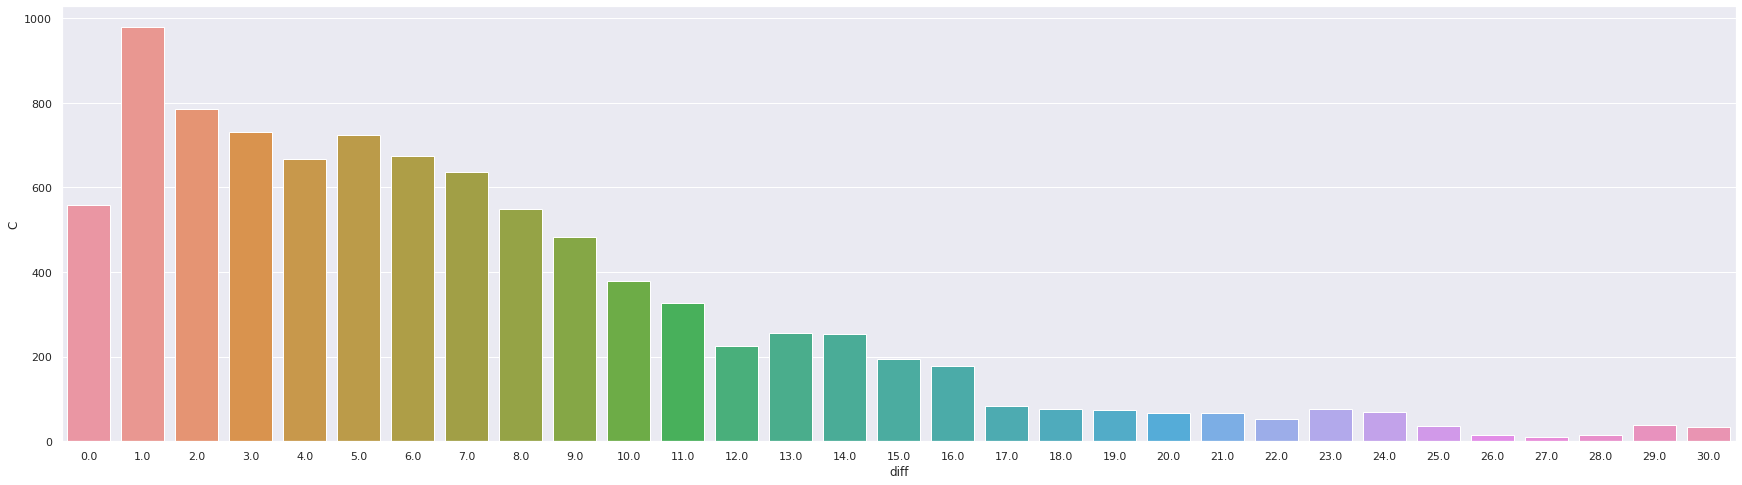

In [ ]:
# I want to view the distribution of frequency of originators transacting within same day, next day, 3 days...30 days.

# Based on the plot below, it looks like, most originators transact within 1 day.
# But, does it mean that the rolling window calculation of 1 day will be succesful?
import seaborn as sns
f=sns.set(rc={'figure.figsize':(30, 8)})
t=sns.barplot(x=df.index,y=df.C)
plt.show()

In [ ]:
#I need to fill na in my days difference dataset with some other arbitrary value so I can view the frequency of fraud.
df2ES=df_diffES.copy()
df2ES['diff'] = df2ES['diff'].fillna(99999)
df2ES

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
95,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C835773569,TRANSFER,C1359044626,0.00,710544.77,0.00,738531.50,16518.36,0,0,1,IncreaseReceiverBalance,23.0
834,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1101598632,CASH_OUT,C248609774,0.00,173597.57,0.00,3104598.86,6453430.91,0,0,1,DecreaseReceiverBalance,25.0
835,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1032568028,CASH_OUT,C667346055,0.00,77642.84,0.00,416103.33,9291619.62,0,0,1,DecreaseReceiverBalance,16.0
1241,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1892869131,DEBIT,C33524623,152809.00,3039.84,149769.16,2079710.62,1517262.16,0,0,1,IncreaseReceiverBalance,7.0
2165,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1859823482,CASH_IN,C1529115495,6668468.08,201342.13,6869810.21,268157.57,67268.02,0,0,1,IncreaseReceiverBalance,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359886,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C876817986,PAYMENT,M2021251796,38313.00,3470.96,34842.04,0.00,0.00,0,0,1,IncreaseReceiverBalance,8.0
6360204,715,2020-01-30,2020-01-30 19:00:00,19,30,1,2020,C1313642079,TRANSFER,C927206109,110425.00,118688.81,0.00,0.00,118688.81,0,0,1,IncreaseReceiverBalance,29.0
6360821,717,2020-01-30,2020-01-30 21:00:00,21,30,1,2020,C188194996,CASH_OUT,C1210630308,69491.00,40187.86,29303.14,679792.78,719980.63,0,0,1,DecreaseReceiverBalance,29.0
6361231,717,2020-01-30,2020-01-30 21:00:00,21,30,1,2020,C1170262181,CASH_OUT,C1991152940,253420.00,82899.05,170520.95,61709.64,144608.69,0,0,1,DecreaseReceiverBalance,8.0


In [ ]:
isFraud = df2ES[df2ES["isFraud"] == 1]
isNotFraud = df2ES[df2ES["isFraud"] != 1]

In [ ]:
t1ES=pd.crosstab(isFraud['diff'], isFraud['type'])
t1ES

type,CASH_OUT,TRANSFER
diff,,
0.0,0,2
1.0,1,0
2.0,0,1
4.0,1,0
7.0,1,0
8.0,2,0
11.0,0,1
13.0,1,0
14.0,3,0


In [ ]:
listed = isFraud[isFraud["diff"] == 0]
listed.head()

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
4438878,323,2020-01-13,2020-01-13 11:00:00,11,13,1,2020,C1899367925,TRANSFER,C2085710932,25761.04,25761.04,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,0.0
4785662,342,2020-01-14,2020-01-14 06:00:00,6,14,1,2020,C929585215,TRANSFER,C634016277,348952.97,348952.97,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,0.0


In [ ]:
listed = isFraud[isFraud["diff"] == 1]
listed.head()

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
3193184,243,2020-01-10,2020-01-10 03:00:00,3,10,1,2020,C876181265,CASH_OUT,C24324787,1290193.08,1290193.08,0.0,0.0,1290193.08,1,0,1,DecreaseReceiverBalance,1.0


In [ ]:
listed = isFraud[isFraud["diff"] == 2]
listed.head()

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
3980908,297,2020-01-12,2020-01-12 09:00:00,9,12,1,2020,C483009518,TRANSFER,C1272462265,3105902.49,3105902.49,0.0,0.0,0.0,1,0,1,IncreaseReceiverBalance,2.0


In [ ]:
t2ES=pd.crosstab(isNotFraud['diff'], isNotFraud['type'])
t2ES


type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
diff,,,,,
0.0,117,202,6,182,49
1.0,231,336,8,319,84
2.0,145,287,3,287,63
3.0,153,259,6,249,63
4.0,146,217,6,241,56
5.0,165,255,7,226,70
6.0,142,267,4,210,51
7.0,126,204,4,247,55
8.0,130,191,5,178,42


In [ ]:
pd.crosstab(isNotFraud['nameOrig'], isNotFraud['diff'])

diff,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,99999.0
nameOrig,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C100025963,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C1000442951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C1000947901,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C1001064466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C1001477354,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C999741107,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C999741114,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C999849840,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Conclusion for population nr 2: Entire Set


The population analyzed above pertained entire data 'Import' making payment to beneficiary, and includes following:
-CASH-IN
-DEBIT
-PAYMENT
-TRANSFER
-Cash-Out

Based on my analysis, there are 2 originators that made payments to multiple beneficiaries within the same day:

-C1899367925
-C929585215

And there is one originator that made payments within 1 day:

-C876181265


In [ ]:
filter_list = ['C1899367925', 'C929585215', 'C876181265']
TheList = df_diffES[df_diffES.nameOrig.isin(filter_list)]
TheList

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,MoneyMoves,diff
2636459,209,2020-01-09,2020-01-09 17:00:00,17,9,1,2020,C876181265,PAYMENT,M321063872,10640.00,4310.42,6329.58,0.00,0.00,0,0,1,IncreaseReceiverBalance,NaN
3193184,243,2020-01-10,2020-01-10 03:00:00,3,10,1,2020,C876181265,CASH_OUT,C24324787,1290193.08,1290193.08,0.00,0.00,1290193.08,1,0,1,DecreaseReceiverBalance,1.0
4075496,301,2020-01-13,2020-01-13 13:00:00,13,13,1,2020,C1899367925,CASH_OUT,C941080961,14970.00,9674.64,5295.36,0.00,9674.64,0,0,1,DecreaseReceiverBalance,NaN
4438878,323,2020-01-13,2020-01-13 11:00:00,11,13,1,2020,C1899367925,TRANSFER,C2085710932,25761.04,25761.04,0.00,0.00,0.00,1,0,1,IncreaseReceiverBalance,0.0
4680837,331,2020-01-14,2020-01-14 19:00:00,19,14,1,2020,C929585215,CASH_OUT,C1330465847,0.00,74278.79,0.00,546074.59,620353.38,0,0,1,DecreaseReceiverBalance,NaN
4785662,342,2020-01-14,2020-01-14 06:00:00,6,14,1,2020,C929585215,TRANSFER,C634016277,348952.97,348952.97,0.00,0.00,0.00,1,0,1,IncreaseReceiverBalance,0.0


Based on the table above, this is my understanding of the rules that govern fraud:

At '2020-01-09 17:00:00' an originator: 'C876181265', made payment to 'M321063872' of the amount of 4,310.42 and he has now left 6,329.58. The old balance and new balance of originator add up. The payment is not registered under new balance destination, and it is marked **not fraud.

Next, at '2020-01-10 03:00:00'an originator: 'C876181265' is trying to cash out 1,290,193.08 and that amount is registered under new balance destination. The old balance(from previous step) and new balance (at time t) of originator does not add up. The transaction is registered as fraud.


It seems to me that the fraud is marked when old and new balance do not add up on originator site and when originator is trying to move more money than currently in the balance.

# My observations on this dataset

Based on my analysis and observations, below are my conclusions:

1.	There is no evidence supporting theory that difference in days between transactions by the same originator is associated with fraud. Although, most transactions by the same originator occur within 1 day, it does not mean that most fraud also occurs within 1 day.

2.	This dataset does not represent standard and real life transactional dataset. It is a simulated data that comes with following limitations:
-	Most of the transactions are performed by unique originators.
-	It means that the same originator does not appear multiple times often.
-	The most single originator repeats in data is 3 times.

3.	Because of this, there is very low likelihood that this dataset represents structuring in traditional sense.

4.	Since this is not 'structuring-like' dataset, the rule of CTR (in the traditional sense) does not apply.

5.	For the reference: I have simulated/created my own structuring challenge in RStudio and posted it here: https://rpubs.com/AnnaSupady/dsc2

6.	For dataset like this, instead of looking for sequence of transactions within hours/days interval, I would track fraud by variable: 'type', over time along with the fraud rate. It is alarming that single day got hit by 100% fraud rate (January 3rd, or day 3 of the dataset).

7.	In the future, I would try to find association between cash out and transfers, as these are the only categories under 'type' that carry fraud.

# AML Rules

## Exact Amount Rule

In [ ]:
pd.crosstab(Import['type'], Import['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
x=4116+4097
x

8213

In [ ]:
#1). Developing "Exact amount" rule
exact=Import.copy()
exact['exactamount']=np.where(exact['oldbalanceOrg']==exact['amount'], 'yes','no')
exact.sort_values(['exactamount'], ascending=False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,exactamount
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.00,C873221189,6510099.11,7360101.63,1,0,yes
1030516,69,CASH_OUT,2960254.17,C262990065,2960254.17,0.00,C1242379975,620822.89,3581077.07,1,0,yes
1030505,69,TRANSFER,271731.05,C659199413,271731.05,0.00,C1444079719,0.00,0.00,1,0,yes
1030506,69,CASH_OUT,271731.05,C48017106,271731.05,0.00,C1750307657,0.00,271731.05,1,0,yes
1030507,69,TRANSFER,7728992.56,C139632487,7728992.56,0.00,C1966690861,0.00,0.00,1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2122022,183,TRANSFER,310195.13,C1723147437,25191.00,0.00,C1553160352,1538293.65,1848488.78,0,0,no
2122021,183,CASH_OUT,64478.83,C1645731942,123498.00,59019.17,C1584748067,0.00,64478.83,0,0,no
2122020,183,CASH_OUT,235959.17,C1805030304,214832.00,0.00,C1379715813,122456.20,358415.36,0,0,no
2122019,183,CASH_IN,343044.47,C2147460418,30250.00,373294.47,C129767089,0.00,0.00,0,0,no


In [ ]:
pd.crosstab(exact['exactamount'], exact['type'])

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
exactamount,,,,,
no,1399284,2233409,41432,2151495,528966
yes,0,4091,0,0,3943


In [ ]:
pd.crosstab(exact['exactamount'], exact['isFraud'])

isFraud,0,1
exactamount,,
no,6354407,179
yes,0,8034


In [ ]:
#We have 8034 of total fraud cases
fraudall=4091+3943
fraudall

8034

In [ ]:
#My rule on exact amount detected 97% cases:
prcdetected=8034/8213
prcdetected

0.9782052843053696

In [ ]:
diffdetected=8213-8034
diffdetected

179

In [ ]:
#Let's examine what we missed:

whatImissed = exact[(exact.exactamount == 'no') & (exact.isFraud == 1)]
whatImissed

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,exactamount
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.0,9291619.62,1,0,no
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.0,132842.64,1,0,no
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.00,1,0,no
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.0,184477.77,1,0,no
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.0,970749.68,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.00,1,0,no
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.00,1,0,no
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.00,1,0,no
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.00,1,0,no


## No Exact Amount Rule

In [ ]:
#Based on the analysis, it looks like we can detect more fraud if we look for observations when either:

#-oldbalanceOrg
#-newbalanceOrig
#-oldbalanceDest
#-newbalanceDest
#Is missing

#Let's examine what we missed:

whatImissed = exact[(exact.exactamount == 'no') & (exact.newbalanceDest == 0)]
whatImissed

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,exactamount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0,no
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0,no
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0,no
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0,no
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.0,1,0,no
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0,no
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0,no
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0,no


In [ ]:
pd.crosstab(whatImissed['type'], whatImissed['isFraud'])

isFraud,0,1
type,,
CASH_IN,270871,0
CASH_OUT,11402,0
DEBIT,468,0
PAYMENT,2151495,0
TRANSFER,1106,148


In [ ]:
whatImissed2 = exact[(exact.exactamount == 'no') & (exact.newbalanceDest != 0)]
whatImissed2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,exactamount
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0,no
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0,no
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0,0,no
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0,no
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.00,C932583850,6267.00,2719172.89,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.00,C784108220,345042.13,662219.61,0,0,no
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0,no
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0,no
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0,no


In [ ]:
pd.crosstab(whatImissed2['type'], whatImissed2['isFraud'])

isFraud,0,1
type,,
CASH_IN,1128413,0
CASH_OUT,2221982,25
DEBIT,40964,0
TRANSFER,527706,6


In [ ]:
#The second rule detected additional 31 out of remaining 31 fraud cases
x=179-148
x

31

## CRT avoidance

In [ ]:
#Lets imagine, that the fraud is performed by organized crime institution and hires people and opens for them different accounts
#The transactions are not related on the surface, since they are performed by unique accounts.
#But in fact, this is situation of moving money in organized way.
#Can we apply CTR policy here? Meaning, are there many transactions just below $10,000?


#2). CRT avoidance
CTR=Import.copy()
CTR['CTR']=np.where(CTR['amount']<10000, 'yes','no')
CTR.sort_values(['CTR'], ascending=False)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,CTR
0,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1231006815,PAYMENT,M1979787155,"170,136.0","9,839.64","160,296.36",0.0,0.0,0,0,1,yes
2754985,212,2020-01-09,2020-01-09 20:00:00,20,9,1,2020,C378805735,PAYMENT,M1207371713,"28,982.0","1,443.55","27,538.45",0.0,0.0,0,0,1,yes
1264081,134,2020-01-06,2020-01-06 14:00:00,14,6,1,2020,C328403449,PAYMENT,M1779760492,"152,611.0","3,434.18","149,176.82",0.0,0.0,0,0,1,yes
2754977,212,2020-01-09,2020-01-09 20:00:00,20,9,1,2020,C1947044905,PAYMENT,M404233322,0.0,"3,586.55",0.0,0.0,0.0,0,0,1,yes
5362096,375,2020-01-16,2020-01-16 15:00:00,15,16,1,2020,C987472418,PAYMENT,M1511544795,"31,413.0","8,155.98","23,257.02",0.0,0.0,0,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354910,190,2020-01-08,2020-01-08 22:00:00,22,8,1,2020,C361685011,PAYMENT,M1351252520,"259,792.0","11,601.47","248,190.53",0.0,0.0,0,0,1,no
2354909,190,2020-01-08,2020-01-08 22:00:00,22,8,1,2020,C1631218663,CASH_OUT,C1194842245,"26,433.0","279,540.1",0.0,"488,465.48","768,005.59",0,0,1,no
2354906,190,2020-01-08,2020-01-08 22:00:00,22,8,1,2020,C495073079,PAYMENT,M429398757,"45,679.0","10,266.46","35,412.54",0.0,0.0,0,0,1,no
2354904,190,2020-01-08,2020-01-08 22:00:00,22,8,1,2020,C1092137154,CASH_OUT,C1441378585,"96,603.0","171,250.56",0.0,"620,074.09","791,324.65",0,0,1,no


In [ ]:
pd.crosstab(CTR['CTR'], CTR['isFraud'])

isFraud,0,1
CTR,,
no,5068682,7935
yes,1285725,278


In [ ]:
whatCTRis = CTR[(CTR.CTR == 'yes') & (CTR.isFraud == 1)]
whatCTRis

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,CTR
2,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1305486145,TRANSFER,C553264065,181.0,181.0,0.0,0.0,0.0,1,0,1,yes
3,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C840083671,CASH_OUT,C38997010,181.0,181.0,0.0,"21,182.0",0.0,1,0,1,yes
251,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1420196421,TRANSFER,C972765878,"2,806.0","2,806.0",0.0,0.0,0.0,1,0,1,yes
252,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C2101527076,CASH_OUT,C1007251739,"2,806.0","2,806.0",0.0,"26,202.0",0.0,1,0,1,yes
12179,7,2020-01-31,2020-01-31 07:00:00,7,31,1,2020,C1455969984,TRANSFER,C2119910556,164.0,164.0,0.0,0.0,0.0,1,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362461,730,2020-01-30,2020-01-30 10:00:00,10,30,1,2020,C729003789,CASH_OUT,C1388096959,0.0,0.0,0.0,"1,008,609.53","1,008,609.53",1,0,1,yes
6362463,730,2020-01-30,2020-01-30 10:00:00,10,30,1,2020,C2088151490,CASH_OUT,C1156763710,0.0,0.0,0.0,0.0,0.0,1,0,1,yes
6362566,739,2020-01-31,2020-01-31 19:00:00,19,31,1,2020,C2072430566,TRANSFER,C765215468,"8,116.53","8,116.53",0.0,0.0,0.0,1,0,1,yes
6362567,739,2020-01-31,2020-01-31 19:00:00,19,31,1,2020,C564539602,CASH_OUT,C1935865739,"8,116.53","8,116.53",0.0,"7,638.26","15,754.79",1,0,1,yes


In [ ]:
#I would like to know, how many unique originators am I dealing with?
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(whatCTRis)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,CTR
Total,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
Uniques,126,31,125,24,31,1,1,278,2,277,132,132,1,102,141,1,1,1,1


In [ ]:
#Based on the result above, I see that all potential 'organized structuing' was performed by unique originators, but
# there were 2 times exact same beneficiary ('C200064275') received amount.
ids = whatCTRis["nameDest"]
RepeatingnameDest=whatCTRis[ids.isin(ids[ids.duplicated()])]
RepeatingnameDest.sort_values(['nameDest'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter,CTR
181901,12,2020-01-31,2020-01-31 12:00:00,12,31,1,2020,C343345083,CASH_OUT,C200064275,"8,677.0","8,677.0",0.0,"225,127.62","233,804.62",1,0,1,yes
301802,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C1065370362,CASH_OUT,C200064275,170.0,170.0,0.0,"413,421.36","345,764.15",1,0,1,yes


## Suspicious Behavior

In [ ]:
# Is this beneficiary suspicious?

filter_list = ['C200064275']
suspicious = Import[Import.nameDest.isin(filter_list)]
suspicious

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
98679,10,2020-01-31,2020-01-31 10:00:00,10,31,1,2020,C62497804,TRANSFER,C200064275,843.0,"70,382.1",0.0,"27,485.0","97,867.1",0,0,1
139707,11,2020-01-31,2020-01-31 11:00:00,11,31,1,2020,C897062269,CASH_IN,C200064275,424.0,"225,251.05","225,675.05",0.0,0.0,0,0,1
160472,12,2020-01-31,2020-01-31 12:00:00,12,31,1,2020,C1111342822,CASH_OUT,C200064275,624.0,"225,127.62",0.0,0.0,"233,804.62",0,0,1
181901,12,2020-01-31,2020-01-31 12:00:00,12,31,1,2020,C343345083,CASH_OUT,C200064275,"8,677.0","8,677.0",0.0,"225,127.62","233,804.62",1,0,1
228796,14,2020-01-01,2020-01-01 14:00:00,14,1,1,2020,C1642312175,CASH_OUT,C200064275,0.0,"179,616.74",0.0,"233,804.62","413,421.36",0,0,1
301802,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C1065370362,CASH_OUT,C200064275,170.0,170.0,0.0,"413,421.36","345,764.15",1,0,1
303494,15,2020-01-01,2020-01-01 15:00:00,15,1,1,2020,C134040840,CASH_IN,C200064275,"8,493,174.81","67,827.21","8,561,002.02","413,591.36","345,764.15",0,0,1
350965,17,2020-01-01,2020-01-01 17:00:00,17,1,1,2020,C1106819503,CASH_OUT,C200064275,"5,095.0","282,223.31",0.0,"345,764.15","785,488.95",0,0,1
354167,17,2020-01-01,2020-01-01 17:00:00,17,1,1,2020,C1174824305,CASH_OUT,C200064275,"11,854.0","220,327.16",0.0,"627,987.46","785,488.95",0,0,1
358590,17,2020-01-01,2020-01-01 17:00:00,17,1,1,2020,C1699087221,CASH_IN,C200064275,"12,510,175.4","62,825.67","12,573,001.08","848,314.62","785,488.95",0,0,1


In [ ]:
#Maybe, since there are 2 cases of fraud associated with his transactions
pd.crosstab(suspicious['nameDest'], suspicious['isFraud'])

isFraud,0,1
nameDest,,
C200064275,31,2


In [ ]:
#Can I identify all repeating beneficiaries?
ids = Import["nameDest"]
RepeatingnameDest=Import[ids.isin(ids[ids.duplicated()])]
RepeatingnameDest.sort_values(['nameDest'])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4987517,352,CASH_IN,156985.31,C1180747031,36186.00,193171.31,C1000004082,0.00,0.00,0,0
5462768,379,CASH_IN,156015.83,C1185840905,55451.00,211466.83,C1000004082,1923026.06,1767010.23,0,0
5659867,396,CASH_IN,23297.19,C984964842,1030993.30,1054290.49,C1000004082,1767010.23,1743713.04,0,0
5219127,370,TRANSFER,1331742.99,C1539355936,11088.00,0.00,C1000004082,228252.33,1559995.31,0,0
5032095,354,CASH_OUT,228252.33,C1978911345,953.00,0.00,C1000004082,0.00,228252.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...
555548,22,PAYMENT,7738.56,C671115629,45439.00,37700.44,M995849630,0.00,0.00,0,0
2119013,183,PAYMENT,1645.19,C539662831,152365.23,150720.04,M995979279,0.00,0.00,0,0
1360106,138,PAYMENT,46360.12,C2073139808,250000.29,203640.17,M995979279,0.00,0.00,0,0
5553963,383,PAYMENT,5289.69,C1035083578,13031.00,7741.31,M998131649,0.00,0.00,0,0


In [ ]:
#Here I am getting number of times repeating beneficiaries received transactions that were confirmed as fraud
isFraud = RepeatingnameDest[(RepeatingnameDest.isFraud == 1)]
isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [ ]:
df=isFraud.copy()
df['freq'] = df.groupby('nameDest')['nameDest'].transform('count')
df.sort_values("freq",  ascending=False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,freq
6362339,720,CASH_OUT,79039.81,C838045354,79039.81,0.0,C1980653895,11270532.70,11349572.51,1,0,2
49826,9,CASH_OUT,2539898.07,C728718059,2539898.07,0.0,C1013511446,968.00,1842864.22,1,0,2
4239379,306,CASH_OUT,143175.23,C1950513519,143175.23,0.0,C1497532505,695647.18,838822.41,1,0,2
4785683,344,CASH_OUT,2231580.50,C1202921665,2231580.50,0.0,C1366192319,499195.63,2730776.13,1,0,2
2382770,201,CASH_OUT,16182.70,C1296182118,16182.70,0.0,C1650668671,0.00,16182.70,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1846400,163,CASH_OUT,163294.35,C1921431894,163294.35,0.0,C1280060028,234212.42,397506.77,1,0,1
1846399,163,TRANSFER,163294.35,C1008040846,163294.35,0.0,C1284780903,0.00,0.00,1,0,1
1832573,163,TRANSFER,762135.72,C1455660898,762135.72,0.0,C364400523,0.00,0.00,1,0,1
1812968,163,CASH_OUT,134194.59,C663221524,134194.59,0.0,C1335637774,1656961.35,1791155.94,1,0,1


In [ ]:
pd.crosstab(df['freq'], df['type'])

type,CASH_OUT,TRANSFER
freq,,
1,3605,1847
2,69,19


# Rule development Results


1.	I was able to develop a rule that captures 97.8% of fraud cases by looking for transactions that meet following rule: ‘exact amount’ is when ‘oldbalanceOrg’= ‘amount’. This rule did not identify 179 cases.

2.	I looked at transactions outside of the rule for ‘exact amount’ where newbalanceDest = 0. By looking at the frequency, I found 148 cases out of 179 that I missed.

3.	When I looked outside of that rule where newbalanceDest is not equal 0, I found remaining 31 fraud cases. (179=148+31)

4.	In addition, I looked for different type of structuring:

Let’s imagine, that the fraud is performed by organized crime institution that hires people and opens for them different accounts. The transactions are not related on the surface, since they are performed by unique accounts, but in fact, this is situation of moving money in organized way. Are there many transactions just below $10,000?

1.	Based on my analysis, when setting amount to less or equal $10,000, I found 278 confirmed fraud cases. I was interested to see how many unique beneficiaries were recipients of transactions that meet this rule. I found only one: ‘C200064275’. This beneficiary appeared 33 times in the data with only 2 confirmed fraud cases.
2. This gave me idea to look for beneficiaries that received multiple transactions from any originators.
3. There were 69 instances when unique beneficiary received cash-out 2 times and 19 cases when unique beneficiary received transfer 2 times.


# Above the Line, Below the Line Tuning

In [ ]:
# Re-examine, which category contains fraud
pd.crosstab(Import['isFraud'], Import['type'])

# The purpose of tuning, will be to find a rule that captures most of the 4,097 effective alerts

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


In [ ]:
# For this tuning example, take only transfers,
TRANSFER = Import[(Import.type == "TRANSFER")]
TRANSFER.sort_values("DateTime",  ascending=True)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
572236,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1176961986,TRANSFER,C1948838736,0.00,233582.32,0.0,382863.95,616446.27,0,0,1
572031,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1149214907,TRANSFER,C1215908187,0.00,30495.09,0.0,751562.57,782057.66,0,0,1
572032,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1218170731,TRANSFER,C1635730493,0.00,281514.73,0.0,1135773.92,1417288.65,0,0,1
572033,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C993320364,TRANSFER,C1486483954,0.00,185735.38,0.0,405744.11,591479.49,0,0,1
572034,24,2020-01-01,2020-01-01 00:00:00,0,1,1,2020,C1649316716,TRANSFER,C364493028,0.00,168529.59,0.0,369615.47,538145.06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,2020-01-31,2020-01-31 22:00:00,22,31,1,2020,C778071008,TRANSFER,C1812552860,63416.99,63416.99,0.0,0.00,0.00,1,0,1
6362616,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1529008245,TRANSFER,C1881841831,6311409.28,6311409.28,0.0,0.00,0.00,1,0,1
6362612,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C1531301470,TRANSFER,C1470998563,1258818.82,1258818.82,0.0,0.00,0.00,1,0,1
6362614,743,2020-01-31,2020-01-31 23:00:00,23,31,1,2020,C2013999242,TRANSFER,C1850423904,339682.13,339682.13,0.0,0.00,0.00,1,0,1


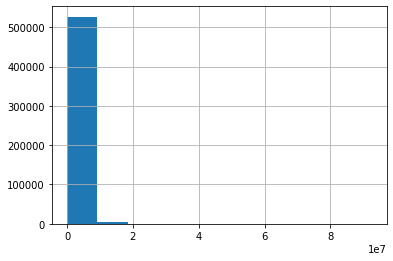

In [ ]:
TRANSFER['amount'].hist()

In [ ]:
#Split the data containing only transfers into fraud and no-fraud
TRANSFER_FRAUD = TRANSFER[(TRANSFER.isFraud == 1)]
TRANSFER_NO_FRAUD = TRANSFER[(TRANSFER.isFraud == 0)]

In [ ]:
TransbynameOrig = pd.concat([TRANSFER_FRAUD.groupby("nameOrig")["counter"].sum(),TRANSFER_FRAUD.groupby("nameOrig")["amount"].sum(),TRANSFER_FRAUD.groupby("nameOrig")["amount"].mean()],axis=1)
TransbynameOrig.columns = ["Frequency", "SumAmount","MeanAmount"]
TransbynameOrig['alert'] = "effective"
TransbynameOrig.sort_values("Frequency",  ascending=False)

#Select one of the descriptive statistics for tuning parameters
pd.options.display.float_format = '{:,}'.format
TransbynameOrig.describe()

,Frequency,SumAmount,MeanAmount,alert
nameOrig,,,,
C1000036340,1,253648.68,253648.68,effective
C1945733096,1,335859.86,335859.86,effective
C353840221,1,357836.57,357836.57,effective
C354106674,1,1388774.78,1388774.78,effective
C354542931,1,339152.24,339152.24,effective
...,...,...,...,...
C1631482807,1,3892156.30,3892156.30,effective
C1632129790,1,6262505.91,6262505.91,effective
C16325193,1,60646.82,60646.82,effective


,Frequency,SumAmount,MeanAmount
count,"4,097.0","4,097.0","4,097.0"
mean,1.0,"1,480,891.6729338542","1,480,891.6729338542"
std,0.0,"2,414,890.3787160846","2,414,890.3787160846"
min,1.0,63.8,63.8
25%,1.0,"128,417.96","128,417.96"
50%,1.0,"445,705.76","445,705.76"
75%,1.0,"1,534,985.07","1,534,985.07"
max,1.0,"10,000,000.0","10,000,000.0"


**25th Percentile** - Also known as the first, or lower, quartile. The 25th percentile is the value at which 25% of the "observations" lie below that value, and 75% of the "observations" lie above that value.

**50th Percentile** - Also known as the Median. The median cuts the data set in half.  Half of the "observations" lie below the median and half lie above the median.

**75th Percentile** - Also known as the third, or upper, quartile. The 75th percentile is the value at which 25% of the "observations" lie above that value and 75% of the "observations" lie below that value.



In [ ]:
TransbynameOrig2 = pd.concat([TRANSFER_NO_FRAUD.groupby("nameOrig")["counter"].sum(),TRANSFER_NO_FRAUD.groupby("nameOrig")["amount"].sum(),TRANSFER_NO_FRAUD.groupby("nameOrig")["amount"].mean()],axis=1)
TransbynameOrig2.columns = ["Frequency", "SumAmount","MeanAmount"]
TransbynameOrig2['alert'] = "non-effective"
TransbynameOrig2.sort_values("Frequency",  ascending=False)

#Select one of the descriptive statistics for tuning parameters
pd.options.display.float_format = '{:,}'.format
TransbynameOrig2.describe()

,Frequency,SumAmount,MeanAmount,alert
nameOrig,,,,
C940075559,2,"306,344.06","153,172.03",non-effective
C1322202354,2,"1,654,074.0899999999","827,037.0449999999",non-effective
C482952496,2,"884,116.72","442,058.36",non-effective
C1212164269,2,"660,471.9400000001","330,235.97000000003",non-effective
C729560990,2,"326,106.81","163,053.405",non-effective
...,...,...,...,...
C1646661248,1,"357,524.64","357,524.64",non-effective
C1646657907,1,"629,283.64","629,283.64",non-effective
C1646657159,1,"479,267.91","479,267.91",non-effective


,Frequency,SumAmount,MeanAmount
count,"528,744.0","528,744.0","528,744.0"
mean,1.000128606660312,"906,345.554898325","906,231.333689858"
std,0.011339769126334685,"1,874,284.280334184","1,874,110.6517551476"
min,1.0,2.6,2.6
25%,1.0,"216,603.2625","216,590.9725"
50%,1.0,"486,565.17","486,538.29000000004"
75%,1.0,"972,890.87","972,785.77"
max,2.0,"92,445,516.64","92,445,516.64"


In [ ]:
# stack the two DataFrames
TransbynameOrig_ALL=pd.concat([TransbynameOrig2, TransbynameOrig])
TransbynameOrig_ALL.head(10)

,Frequency,SumAmount,MeanAmount,alert
nameOrig,,,,
C1000005353,1,3228390.11,3228390.11,non-effective
C1000005749,1,3229333.12,3229333.12,non-effective
C1000008236,1,673726.47,673726.47,non-effective
C1000009606,1,235163.72,235163.72,non-effective
C1000010387,1,165944.75,165944.75,non-effective
C1000024959,1,420906.13,420906.13,non-effective
C100002734,1,1288884.48,1288884.48,non-effective
C1000028645,1,127894.89,127894.89,non-effective
C100003513,1,940361.66,940361.66,non-effective


In [ ]:
pd.crosstab(TransbynameOrig_ALL['Frequency'], TransbynameOrig_ALL['alert'])

alert,effective,non-effective
Frequency,,
1,4097,528676
2,0,68


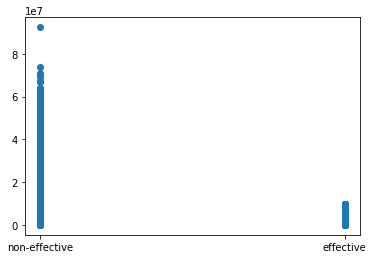

In [ ]:
plt.scatter(TransbynameOrig_ALL.alert, TransbynameOrig_ALL.MeanAmount)
plt.show()

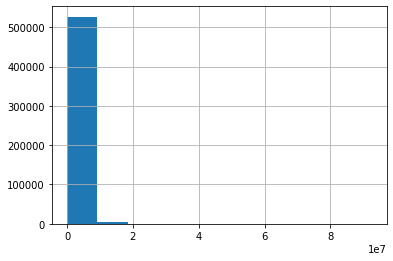

In [ ]:
TransbynameOrig_ALL['MeanAmount'].hist()

### Tuning alerts:

#### '>= 75th Percentile'

In [ ]:
test = TRANSFER[(TRANSFER.amount >= 1534985)]
test.head(2)

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
94,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1495608502,TRANSFER,C1590550415,0.0,"1,724,887.05",0.0,"3,470,595.1","19,169,204.93",0,0,1
358,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C476579021,TRANSFER,C1590550415,0.0,"1,538,200.39",0.0,"6,977,445.38","19,169,204.93",0,0,1


In [ ]:
pd.crosstab(test['counter'], test['isFraud'])

isFraud,0,1
counter,,
1,67043,1025


#### '< 75th Percentile'

In [ ]:
test2 = TRANSFER[(TRANSFER.amount < 1534985)]
test2.head(2)
pd.crosstab(test2['counter'], test2['isFraud'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
2,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1305486145,TRANSFER,C553264065,181.0,181.0,0.0,0.0,0.0,1,0,1
19,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1670993182,TRANSFER,C1100439041,705.0,"215,310.3",0.0,"22,425.0",0.0,0,0,1


isFraud,0,1
counter,,
1,461769,3072


#### '>= Average'

In [ ]:
test3 = TRANSFER[(TRANSFER.amount >= 1480891.6729338542)]
test3.head(2)
pd.crosstab(test3['counter'], test3['isFraud'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
85,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C926859124,TRANSFER,C665576141,0.0,"1,505,626.01",0.0,"29,031.0","5,515,763.34",0,0,1
94,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1495608502,TRANSFER,C1590550415,0.0,"1,724,887.05",0.0,"3,470,595.1","19,169,204.93",0,0,1


isFraud,0,1
counter,,
1,71200,1054


#### '< Average'

In [ ]:
test4 = TRANSFER[(TRANSFER.amount < 1480891.6729338542)]
test4.head(2)
pd.crosstab(test4['counter'], test4['isFraud'])

,step,Date,DateTime,hour,Day,Month,Year,nameOrig,type,nameDest,oldbalanceOrg,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,counter
2,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1305486145,TRANSFER,C553264065,181.0,181.0,0.0,0.0,0.0,1,0,1
19,1,2020-01-31,2020-01-31 01:00:00,1,31,1,2020,C1670993182,TRANSFER,C1100439041,705.0,"215,310.3",0.0,"22,425.0",0.0,0,0,1


isFraud,0,1
counter,,
1,457612,3043
